In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Define the directory containing the file
data_dir = r'D:\Data Science\Projects\My Projects\Project 12\Horse'

#Get list of all files in the directory
all_files = os.listdir(data_dir)

#Separate the list into horse file and race files
horse_file = [f for f in all_files if f.startswith('horses') and f.endswith('.csv')]

#Initialize empty lists to store DataFrames
horses_list = []

#Read and Concatenate horse files
for file in horse_file:
    df_horse = pd.read_csv(os.path.join(data_dir,file),low_memory=False)
    horses_list.append(df_horse)

all_horses = pd.concat(horses_list,ignore_index=True)

In [3]:
all_horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107315 entries, 0 to 4107314
Data columns (total 28 columns):
 #   Column        Dtype  
---  ------        -----  
 0   rid           int64  
 1   horseName     object 
 2   age           float64
 3   saddle        float64
 4   decimalPrice  float64
 5   isFav         int64  
 6   trainerName   object 
 7   jockeyName    object 
 8   position      int64  
 9   positionL     object 
 10  dist          object 
 11  weightSt      int64  
 12  weightLb      int64  
 13  overWeight    float64
 14  outHandicap   float64
 15  headGear      object 
 16  RPR           float64
 17  TR            float64
 18  OR            float64
 19  father        object 
 20  mother        object 
 21  gfather       object 
 22  runners       int64  
 23  margin        float64
 24  weight        int64  
 25  res_win       float64
 26  res_place     float64
 27  price         object 
dtypes: float64(11), int64(7), object(10)
memory usage: 877.4+ MB


In [4]:
all_horses.head()

rid         horseName  age  saddle  decimalPrice  isFav  \
0  271018        Combermere  6.0     0.0      0.222222      0   
1  271018     Royal Battery  6.0     0.0      0.090909      0   
2  271018           Just So  7.0     0.0      0.029412      0   
3  271018  Mandraki Shuffle  8.0     0.0      0.090909      0   
4  271018    Turnberry Dawn  8.0     0.0      0.047619      0   

       trainerName  jockeyName  position positionL  ...  OR       father  \
0        R G Frost     J Frost         1       NaN  ... NaN      Absalom   
1       D H Barons     S Earle         2        10  ... NaN  Norfolk Air   
2      J D Roberts  S Burrough         3        15  ... NaN        Sousa   
3  Oliver Sherwood  M Richards         4        20  ... NaN     Mandalus   
4      T B Hallett  P Richards         5      dist  ... NaN    Fair Turn   

           mother         gfather  runners    margin  weight  res_win  \
0  Queen's Parade  Sovereign Path       14  1.521003      69      1.0   
1      All At Sea    Man The Rail       14  1.521003      69      0.0   
2    Just Camilla     Ascertain I       14  1.521003      66      0.0   
3      Indictment     Desert Call       14  1.521003      69      0.0   
4    Shuil Alainn        Levanter       14  1.521003      69      0.0   

   res_place price  
0        1.0   NaN  
1        1.0   NaN  
2        1.0   NaN  
3        0.0   NaN  
4        0.0   NaN  

[5 rows x 28 columns]

In [5]:
all_horses.isnull().sum()

rid                   0
horseName             0
age                 309
saddle           179168
decimalPrice          0
isFav                 0
trainerName        2850
jockeyName          125
position              0
positionL        783662
dist            1074385
weightSt              0
weightLb              0
overWeight      4012988
outHandicap     3994332
headGear        3119695
RPR              864877
TR              1681610
OR              1795263
father             1289
mother             4480
gfather          119374
runners               0
margin                0
weight                0
res_win               0
res_place             0
price           4012304
dtype: int64

In [6]:
all_horses = all_horses.drop(['overWeight','outHandicap','headGear','price','isFav'], axis=1)

In [7]:
all_horses.head()

rid         horseName  age  saddle  decimalPrice      trainerName  \
0  271018        Combermere  6.0     0.0      0.222222        R G Frost   
1  271018     Royal Battery  6.0     0.0      0.090909       D H Barons   
2  271018           Just So  7.0     0.0      0.029412      J D Roberts   
3  271018  Mandraki Shuffle  8.0     0.0      0.090909  Oliver Sherwood   
4  271018    Turnberry Dawn  8.0     0.0      0.047619      T B Hallett   

   jockeyName  position positionL  dist  ...    TR  OR       father  \
0     J Frost         1       NaN   NaN  ...  94.0 NaN      Absalom   
1     S Earle         2        10   NaN  ...  88.0 NaN  Norfolk Air   
2  S Burrough         3        15  25.0  ...  71.0 NaN        Sousa   
3  M Richards         4        20  45.0  ...  65.0 NaN     Mandalus   
4  P Richards         5      dist  75.0  ...  45.0 NaN    Fair Turn   

           mother         gfather runners    margin weight  res_win  res_place  
0  Queen's Parade  Sovereign Path      14  1.521003     69      1.0        1.0  
1      All At Sea    Man The Rail      14  1.521003     69      0.0        1.0  
2    Just Camilla     Ascertain I      14  1.521003     66      0.0        1.0  
3      Indictment     Desert Call      14  1.521003     69      0.0        0.0  
4    Shuil Alainn        Levanter      14  1.521003     69      0.0        0.0  

[5 rows x 23 columns]

In [8]:
all_horses.isnull().sum()

rid                   0
horseName             0
age                 309
saddle           179168
decimalPrice          0
trainerName        2850
jockeyName          125
position              0
positionL        783662
dist            1074385
weightSt              0
weightLb              0
RPR              864877
TR              1681610
OR              1795263
father             1289
mother             4480
gfather          119374
runners               0
margin                0
weight                0
res_win               0
res_place             0
dtype: int64

In [9]:
all_horses = all_horses.dropna()
all_horses.reset_index(drop=True, inplace=True)

In [10]:
all_horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167084 entries, 0 to 1167083
Data columns (total 23 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   rid           1167084 non-null  int64  
 1   horseName     1167084 non-null  object 
 2   age           1167084 non-null  float64
 3   saddle        1167084 non-null  float64
 4   decimalPrice  1167084 non-null  float64
 5   trainerName   1167084 non-null  object 
 6   jockeyName    1167084 non-null  object 
 7   position      1167084 non-null  int64  
 8   positionL     1167084 non-null  object 
 9   dist          1167084 non-null  object 
 10  weightSt      1167084 non-null  int64  
 11  weightLb      1167084 non-null  int64  
 12  RPR           1167084 non-null  float64
 13  TR            1167084 non-null  float64
 14  OR            1167084 non-null  float64
 15  father        1167084 non-null  object 
 16  mother        1167084 non-null  object 
 17  gfather       1167084 non-n

In [11]:
all_horses.head()

rid        horseName   age  saddle  decimalPrice       trainerName  \
0  282203           Impany  11.0     0.0      0.250000     Jonjo O'Neill   
1  298761  Highland Bounty   6.0     0.0      0.181818         Simon Dow   
2  298761           Wahiba   6.0     0.0      0.266667        R J Holder   
3  298761  Fairfields Cone   7.0     0.0      0.066667      Robin Dickin   
4  301118     Mineral Dust   7.0     0.0      0.166667  Mrs Gill E Jones   

     jockeyName  position positionL  dist  ...    TR     OR         father  \
0   Lorcan Wyer         3         5   8.0  ...  77.0  111.0       Parasang   
1      S Turner         3        15  16.5  ...  84.0  131.0      High Line   
2     N Coleman         4         5  21.5  ...  76.0  128.0  Tumble Wind I   
3  Martin Jones         5         5  26.5  ...  60.0  121.0    Celtic Cone   
4       J Bryan         3         2   5.0  ...  88.0  102.0     Callernish   

        mother          gfather runners    margin weight  res_win  res_place  
0    Swift Imp  Swift Flight II       3  1.083333     68      0.0        0.0  
1        Segos      Runnymede I       5  1.134199     68      0.0        0.0  
2  Lady Kasbah       Lord Gayle       5  1.134199     66      0.0        0.0  
3  Bond's Best       Good BondI       5  1.134199     61      0.0        0.0  
4    Magnesium          Khalkis      13  1.382585     69      0.0        1.0  

[5 rows x 23 columns]

In [12]:
all_horses_new = all_horses.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [14]:
horses = all_horses_new['horseName'].unique()
horses_mapping = {horse: idx + 1 for idx, horse in enumerate(horses)}
horses_mapping

{'Impany': 1,
 'Highland Bounty': 2,
 'Wahiba': 3,
 'Fairfields Cone': 4,
 'Mineral Dust': 5,
 'Rusty Law': 6,
 'Self Aid': 7,
 'Carfax': 8,
 'Copper Streak': 9,
 'Mrs Peopleater': 10,
 'Final Alma': 11,
 'Marradong Brook': 12,
 'Shalchlo Boy': 13,
 'Desert Palm': 14,
 'Side Brace': 15,
 'Sara Lane': 16,
 'Magic Melissa': 17,
 'Jeassu': 18,
 "Tom's Little Bet": 19,
 "Jay Jay's Voyage": 20,
 'What A Wally': 21,
 'Master Attorney': 22,
 'Holly King': 23,
 'Willowesq': 24,
 'Fighting Days': 25,
 'Tadbir': 26,
 'Up The Ladder': 27,
 'Oriental Dream': 28,
 'Radical Request': 29,
 'Trojan Song': 30,
 'Penalty Double': 31,
 'Purple Prince': 32,
 'Five Lamps': 33,
 'Dominion Treasure': 34,
 'Coire Vannich': 35,
 'Prince Klenk': 36,
 'Royalty Bay': 37,
 'The Bear Lover': 38,
 'Ejay Haitch': 39,
 "The Parson's Nun": 40,
 'Nearly Medina': 41,
 'Hope Cove': 42,
 'Mizaj': 43,
 'Elegant Mary': 44,
 'Isobar': 45,
 'Dawn Coyote': 46,
 'Marshlander': 47,
 'Fair Child': 48,
 'Comedy Lane': 49,
 'Dart Ov

In [15]:
all_horses_new['horseName'] = all_horses_new['horseName'].map(horses_mapping)
all_horses_new.head()

rid  horseName   age  saddle  decimalPrice       trainerName  \
0  282203          1  11.0     0.0      0.250000     Jonjo O'Neill   
1  298761          2   6.0     0.0      0.181818         Simon Dow   
2  298761          3   6.0     0.0      0.266667        R J Holder   
3  298761          4   7.0     0.0      0.066667      Robin Dickin   
4  301118          5   7.0     0.0      0.166667  Mrs Gill E Jones   

     jockeyName  position positionL  dist  ...    TR     OR         father  \
0   Lorcan Wyer         3         5   8.0  ...  77.0  111.0       Parasang   
1      S Turner         3        15  16.5  ...  84.0  131.0      High Line   
2     N Coleman         4         5  21.5  ...  76.0  128.0  Tumble Wind I   
3  Martin Jones         5         5  26.5  ...  60.0  121.0    Celtic Cone   
4       J Bryan         3         2   5.0  ...  88.0  102.0     Callernish   

        mother          gfather runners    margin weight  res_win  res_place  
0    Swift Imp  Swift Flight II       3  1.083333     68      0.0        0.0  
1        Segos      Runnymede I       5  1.134199     68      0.0        0.0  
2  Lady Kasbah       Lord Gayle       5  1.134199     66      0.0        0.0  
3  Bond's Best       Good BondI       5  1.134199     61      0.0        0.0  
4    Magnesium          Khalkis      13  1.382585     69      0.0        1.0  

[5 rows x 23 columns]

In [16]:
trainers = all_horses_new['trainerName'].unique()
trainers_mapping = {trainer: idx + 1 for idx, trainer in enumerate(trainers)}
trainers_mapping

{"Jonjo O'Neill": 1,
 'Simon Dow': 2,
 'R J Holder': 3,
 'Robin Dickin': 4,
 'Mrs Gill E Jones': 5,
 'Michael Banks': 6,
 'J D Roberts': 7,
 'R P C Hoad': 8,
 'T A Forster': 9,
 'Paul Howling': 10,
 'Philip Mitchell': 11,
 'Ron Hodges': 12,
 'D H Barons': 13,
 'Nick Ayliffe': 14,
 'Jim Wilson': 15,
 'W R Williams': 16,
 'M Oliver': 17,
 'D McCain': 18,
 'J A C Edwards': 19,
 'Dai Williams': 20,
 'A Moore': 21,
 'Willie Musson': 22,
 'D J Wintle': 23,
 'W G Morris': 24,
 'Graeme Roe': 25,
 'F Gorman': 26,
 'Charlie Brooks': 27,
 'P Leach': 28,
 'Oliver Sherwood': 29,
 'J H Baker': 30,
 'Philip Hobbs': 31,
 'A R Davison': 32,
 'John Spearing': 33,
 'T Kersey': 34,
 'R J Eckley': 35,
 'N A Gaselee': 36,
 'George Moore': 37,
 'B E Wilkinson': 38,
 'S J Muldoon': 39,
 'Sue Bradburne': 40,
 'D R Gandolfo': 41,
 'D J G Murray Smith': 42,
 'S Christian': 43,
 'W A Stephenson': 44,
 'J S Wilson': 45,
 'Malcolm Jefferson': 46,
 'P Monteith': 47,
 'D Nicholson': 48,
 'M C Pipe': 49,
 'R Akehurst'

In [17]:
all_horses_new['trainerName'] = all_horses_new['trainerName'].map(trainers_mapping)
all_horses_new.head()

rid  horseName   age  saddle  decimalPrice  trainerName    jockeyName  \
0  282203          1  11.0     0.0      0.250000            1   Lorcan Wyer   
1  298761          2   6.0     0.0      0.181818            2      S Turner   
2  298761          3   6.0     0.0      0.266667            3     N Coleman   
3  298761          4   7.0     0.0      0.066667            4  Martin Jones   
4  301118          5   7.0     0.0      0.166667            5       J Bryan   

   position positionL  dist  ...    TR     OR         father       mother  \
0         3         5   8.0  ...  77.0  111.0       Parasang    Swift Imp   
1         3        15  16.5  ...  84.0  131.0      High Line        Segos   
2         4         5  21.5  ...  76.0  128.0  Tumble Wind I  Lady Kasbah   
3         5         5  26.5  ...  60.0  121.0    Celtic Cone  Bond's Best   
4         3         2   5.0  ...  88.0  102.0     Callernish    Magnesium   

           gfather runners    margin weight  res_win  res_place  
0  Swift Flight II       3  1.083333     68      0.0        0.0  
1      Runnymede I       5  1.134199     68      0.0        0.0  
2       Lord Gayle       5  1.134199     66      0.0        0.0  
3       Good BondI       5  1.134199     61      0.0        0.0  
4          Khalkis      13  1.382585     69      0.0        1.0  

[5 rows x 23 columns]

In [18]:
jockeys = all_horses_new['jockeyName'].unique()
jockeys_mapping = {jockey: idx + 1 for idx, jockey in enumerate(jockeys)}
jockeys_mapping

{'Lorcan Wyer': 1,
 'S Turner': 2,
 'N Coleman': 3,
 'Martin Jones': 4,
 'J Bryan': 5,
 'D Skyrme': 6,
 'Gee Armytage': 7,
 'M Hoad': 8,
 'H Davies': 9,
 'M Furlong': 10,
 'Mr R Teal': 11,
 'Carl Llewellyn': 12,
 'D Wonnacott': 13,
 'W Irvine': 14,
 'S Earle': 15,
 'M Ayliffe': 16,
 'N Mann': 17,
 'Peter Scudamore': 18,
 'M Richards': 19,
 'W McFarland': 20,
 'R J Beggan': 21,
 'D McCain': 22,
 'T Morgan': 23,
 'D Hood': 24,
 'G Moore': 25,
 'C Smith': 26,
 'P McDermott': 27,
 'W Morris': 28,
 'P Johnson': 29,
 'S Hodgson': 30,
 'Peter Hobbs': 31,
 'D Morris': 32,
 'Derek Byrne': 33,
 'J Railton': 34,
 'Susan Kersey': 35,
 'Mr M Jackson': 36,
 'J Duggan': 37,
 'A Adams': 38,
 'M Hammond': 39,
 'G Harker': 40,
 'N Old Smith': 41,
 'J Hansen': 42,
 'W Humphreys': 43,
 'P Verling': 44,
 'N Hawke': 45,
 'A Tory': 46,
 'A Mulholland': 47,
 'Kenny Johnson': 48,
 'M Hill': 49,
 "L O'Hara": 50,
 'R Dunwoody': 51,
 'Luke Harvey': 52,
 'K Jones': 53,
 'C Maude': 54,
 'S Keightley': 55,
 'R Rowe'

In [19]:
all_horses_new['jockeyName'] = all_horses_new['jockeyName'].map(jockeys_mapping)
all_horses_new.head()

rid  horseName   age  saddle  decimalPrice  trainerName  jockeyName  \
0  282203          1  11.0     0.0      0.250000            1           1   
1  298761          2   6.0     0.0      0.181818            2           2   
2  298761          3   6.0     0.0      0.266667            3           3   
3  298761          4   7.0     0.0      0.066667            4           4   
4  301118          5   7.0     0.0      0.166667            5           5   

   position positionL  dist  ...    TR     OR         father       mother  \
0         3         5   8.0  ...  77.0  111.0       Parasang    Swift Imp   
1         3        15  16.5  ...  84.0  131.0      High Line        Segos   
2         4         5  21.5  ...  76.0  128.0  Tumble Wind I  Lady Kasbah   
3         5         5  26.5  ...  60.0  121.0    Celtic Cone  Bond's Best   
4         3         2   5.0  ...  88.0  102.0     Callernish    Magnesium   

           gfather runners    margin weight  res_win  res_place  
0  Swift Flight II       3  1.083333     68      0.0        0.0  
1      Runnymede I       5  1.134199     68      0.0        0.0  
2       Lord Gayle       5  1.134199     66      0.0        0.0  
3       Good BondI       5  1.134199     61      0.0        0.0  
4          Khalkis      13  1.382585     69      0.0        1.0  

[5 rows x 23 columns]

In [20]:
fathers = all_horses_new['father'].unique()
fathers_mapping = {father: idx + 1 for idx, father in enumerate(fathers)}
fathers_mapping

{'Parasang': 1,
 'High Line': 2,
 'Tumble Wind I': 3,
 'Celtic Cone': 4,
 'Callernish': 5,
 'Rusticaro': 6,
 'Fine Blade': 7,
 'Tachypous': 8,
 'Streak I': 9,
 'Ancient Monro': 10,
 'Final Straw': 11,
 'Giacometti': 12,
 'Palm Track': 13,
 'Mayo Mellay': 14,
 'Sagaro': 15,
 'New Member': 16,
 'Whistlefield': 17,
 'Scallywag': 18,
 'Saunter': 19,
 'General Ironside': 20,
 'Key To The Kingdom': 21,
 'Octogenarian': 22,
 'Fit To Fight': 23,
 'Try My Best': 24,
 'Taufan': 25,
 'Northfields': 26,
 'Derring Rose': 27,
 'Troy': 28,
 'Deep Run': 29,
 'Sensitive Prince': 30,
 "Paddy's Stream": 31,
 'Dominion': 32,
 'Random Shot': 33,
 'Royalty': 34,
 'Be My Native': 35,
 'The Parson': 36,
 'Nearly A Hand': 37,
 'Thatching': 38,
 'Grey Ghost I': 39,
 'Another Realm': 40,
 'Grey Dawn II': 41,
 'Sheshoon': 42,
 'Le Bavard': 43,
 'Comedy Star': 44,
 'Hardraw Scar': 45,
 'Decent Fellow': 46,
 'Hittite Glory': 47,
 'Nicholas Bill': 48,
 'Fair Mix': 49,
 'Mandalus': 50,
 'Maris Piper': 51,
 'Karabas':

In [21]:
all_horses_new['father'] = all_horses_new['father'].map(fathers_mapping)
all_horses_new.head()

rid  horseName   age  saddle  decimalPrice  trainerName  jockeyName  \
0  282203          1  11.0     0.0      0.250000            1           1   
1  298761          2   6.0     0.0      0.181818            2           2   
2  298761          3   6.0     0.0      0.266667            3           3   
3  298761          4   7.0     0.0      0.066667            4           4   
4  301118          5   7.0     0.0      0.166667            5           5   

   position positionL  dist  ...    TR     OR  father       mother  \
0         3         5   8.0  ...  77.0  111.0       1    Swift Imp   
1         3        15  16.5  ...  84.0  131.0       2        Segos   
2         4         5  21.5  ...  76.0  128.0       3  Lady Kasbah   
3         5         5  26.5  ...  60.0  121.0       4  Bond's Best   
4         3         2   5.0  ...  88.0  102.0       5    Magnesium   

           gfather  runners    margin weight  res_win  res_place  
0  Swift Flight II        3  1.083333     68      0.0        0.0  
1      Runnymede I        5  1.134199     68      0.0        0.0  
2       Lord Gayle        5  1.134199     66      0.0        0.0  
3       Good BondI        5  1.134199     61      0.0        0.0  
4          Khalkis       13  1.382585     69      0.0        1.0  

[5 rows x 23 columns]

In [22]:
mothers = all_horses_new['mother'].unique()
mothers_mapping = {mother: idx + 1 for idx, mother in enumerate(mothers)}
mothers_mapping

{'Swift Imp': 1,
 'Segos': 2,
 'Lady Kasbah': 3,
 "Bond's Best": 4,
 'Magnesium': 5,
 'La Loie Fuller': 6,
 'Laurolin': 7,
 'Montana Moss': 8,
 'Copper Cloud': 9,
 'Flea Pit': 10,
 'Alma Ata': 11,
 'Freuchie': 12,
 'Mala Mala': 13,
 'Diascia': 14,
 'Grey Mist': 15,
 'Maypole Lane': 16,
 'Cape Mandalin*t': 17,
 'Menhaden': 18,
 'Fleet Street Fifty': 19,
 'Traverser': 20,
 'Saint Malva': 21,
 'Miss Leap Year': 22,
 'Chargealero': 23,
 'Tenon Saw*t': 24,
 'August Days': 25,
 'La Grange': 26,
 'Magnesia': 27,
 'Jenny': 28,
 'Kitty Laurence': 29,
 'Melody Hour': 30,
 'Silver Doll': 31,
 'Roses For The Lady': 32,
 'Ballinarose': 33,
 'Chrysicabana': 34,
 'Deepness': 35,
 'Delia Ross': 36,
 'Warham Trout': 37,
 'Miss Mouri': 38,
 'Miss Spencer': 39,
 'Hill Invader': 40,
 'Miss Medina': 41,
 'Bundoran': 42,
 'Stickpin': 43,
 'Mary McQuaker': 44,
 'Lady Eton': 45,
 'Beanery': 46,
 'Dinamarsh': 47,
 'Fair People': 48,
 'Border Lane': 49,
 'Selstone': 50,
 'Good Surprise I': 51,
 'Arctic Daisy': 

In [23]:
all_horses_new['mother'] = all_horses_new['mother'].map(mothers_mapping)
all_horses_new.head()

rid  horseName   age  saddle  decimalPrice  trainerName  jockeyName  \
0  282203          1  11.0     0.0      0.250000            1           1   
1  298761          2   6.0     0.0      0.181818            2           2   
2  298761          3   6.0     0.0      0.266667            3           3   
3  298761          4   7.0     0.0      0.066667            4           4   
4  301118          5   7.0     0.0      0.166667            5           5   

   position positionL  dist  ...    TR     OR  father  mother  \
0         3         5   8.0  ...  77.0  111.0       1       1   
1         3        15  16.5  ...  84.0  131.0       2       2   
2         4         5  21.5  ...  76.0  128.0       3       3   
3         5         5  26.5  ...  60.0  121.0       4       4   
4         3         2   5.0  ...  88.0  102.0       5       5   

           gfather  runners    margin weight  res_win  res_place  
0  Swift Flight II        3  1.083333     68      0.0        0.0  
1      Runnymede I        5  1.134199     68      0.0        0.0  
2       Lord Gayle        5  1.134199     66      0.0        0.0  
3       Good BondI        5  1.134199     61      0.0        0.0  
4          Khalkis       13  1.382585     69      0.0        1.0  

[5 rows x 23 columns]

In [24]:
gfathers = all_horses_new['gfather'].unique()
gfathers_mapping = {gfather: idx + 1 for idx, gfather in enumerate(gfathers)}
gfathers_mapping

{'Swift Flight II': 1,
 'Runnymede I': 2,
 'Lord Gayle': 3,
 'Good BondI': 4,
 'Khalkis': 5,
 'Rheffic': 6,
 'Laurence O': 7,
 'Levmoss': 8,
 'Foggy Bell': 9,
 'Sir Lark': 10,
 'Bustino': 11,
 'Vulgan': 12,
 'Crepello': 13,
 'Dike': 14,
 'Karayar': 15,
 'Grundy': 16,
 'Mandamus': 17,
 'Menelek': 18,
 'I Say': 19,
 'Spiritus': 20,
 'Welsh Pageant': 21,
 'Cantab': 22,
 'Native Charger': 23,
 'Songedor': 24,
 'In Reality': 25,
 'Habitat': 26,
 'Upper Case': 27,
 'Red God': 28,
 'Sing Sing': 29,
 'Sovereign Gleam': 30,
 'Buffalo Lark': 31,
 'Arctic Slave': 32,
 'Home Guard': 33,
 'Deep Run': 34,
 'Dalesa': 35,
 'Barolo': 36,
 'Domaha': 37,
 'Imperial Fling': 38,
 'Brave Invader': 39,
 'St Elmo': 40,
 'Bally Royal': 41,
 'Gulf Pearl': 42,
 'Acer': 43,
 "Le Dieu D'Or": 44,
 'Cavan': 45,
 'Nelcius': 46,
 'Varano': 47,
 'Border Legend': 48,
 'Counsel': 49,
 'Maelsheachlainn': 50,
 'Farm Walk': 51,
 'Mister Lord': 52,
 'Prince Hansel': 53,
 'Normandy': 54,
 'Tarqogan': 55,
 'Kalamoun': 56,
 'Ru

In [25]:
all_horses_new['gfather'] = all_horses_new['gfather'].map(gfathers_mapping)
all_horses_new.head()

rid  horseName   age  saddle  decimalPrice  trainerName  jockeyName  \
0  282203          1  11.0     0.0      0.250000            1           1   
1  298761          2   6.0     0.0      0.181818            2           2   
2  298761          3   6.0     0.0      0.266667            3           3   
3  298761          4   7.0     0.0      0.066667            4           4   
4  301118          5   7.0     0.0      0.166667            5           5   

   position positionL  dist  ...    TR     OR  father  mother  gfather  \
0         3         5   8.0  ...  77.0  111.0       1       1        1   
1         3        15  16.5  ...  84.0  131.0       2       2        2   
2         4         5  21.5  ...  76.0  128.0       3       3        3   
3         5         5  26.5  ...  60.0  121.0       4       4        4   
4         3         2   5.0  ...  88.0  102.0       5       5        5   

   runners    margin  weight  res_win  res_place  
0        3  1.083333      68      0.0        0.0  
1        5  1.134199      68      0.0        0.0  
2        5  1.134199      66      0.0        0.0  
3        5  1.134199      61      0.0        0.0  
4       13  1.382585      69      0.0        1.0  

[5 rows x 23 columns]

In [26]:
all_horses['dist'].unique()

array(['8.0', '16.5', '21.5', '26.5', '5.0', '9.0', '9.5', '12.0', '17.0',
       '17.25', '1.5', '21.75', '28.75', '30.75', '32.75', '33.0', '40.0',
       '41.5', '20.0', '23.0', '24.5', '4.5', '12.5', '15.0', '19.0',
       '7.0', '14.0', '18.0', '22.0', '30.0', '32.5', '16.0', '21.0',
       '22.5', '24.75', '37.0', '24.0', '26.0', '26.25', '3.5', '13.5',
       '25.5', '37.5', '39.5', '31.5', '19.5', '20', '15.25', '45.25',
       '57.25', '7.5', '10.5', '17.5', '4.0', '1.0', '2.0', '8.25',
       '12.25', '42.25', '42.75', '43.75', '44.25', '44.75', '10.0',
       '13.0', '28.0', '38.5', '2.5', '8.5', '18.5', '4.25', '7.25',
       '14.25', '20.25', '10.75', '34.75', '37.25', '0.5', '6.5', '27.0',
       '27.25', '28.25', '11.0', '31.0', '43.0', '10.25', '13.25', '25.0',
       '31.25', '33.75', '32.0', '29.5', '30.25', '35.25', '35.75',
       '36.5', '29.0', '34.5', '44.0', '50.0', '53.0', '61.0', '63.5',
       '64.5', '65.5', '30.5', '47.5', '49.5', '23.25', '34.25', '5.5',
 

In [27]:
# List of values to remove
values_to_remove = ['nk', 'sht-hd', 'hd']

# Filter the DataFrame to exclude rows with these values in 'column1'
all_horses_new = all_horses_new[~all_horses_new['dist'].isin(values_to_remove)]
all_horses_new.head()

rid  horseName   age  saddle  decimalPrice  trainerName  jockeyName  \
0  282203          1  11.0     0.0      0.250000            1           1   
1  298761          2   6.0     0.0      0.181818            2           2   
2  298761          3   6.0     0.0      0.266667            3           3   
3  298761          4   7.0     0.0      0.066667            4           4   
4  301118          5   7.0     0.0      0.166667            5           5   

   position positionL  dist  ...    TR     OR  father  mother  gfather  \
0         3         5   8.0  ...  77.0  111.0       1       1        1   
1         3        15  16.5  ...  84.0  131.0       2       2        2   
2         4         5  21.5  ...  76.0  128.0       3       3        3   
3         5         5  26.5  ...  60.0  121.0       4       4        4   
4         3         2   5.0  ...  88.0  102.0       5       5        5   

   runners    margin  weight  res_win  res_place  
0        3  1.083333      68      0.0        0.0  
1        5  1.134199      68      0.0        0.0  
2        5  1.134199      66      0.0        0.0  
3        5  1.134199      61      0.0        0.0  
4       13  1.382585      69      0.0        1.0  

[5 rows x 23 columns]

In [28]:
all_horses_new['positionL'].unique()

array(['5', '15', '2', 'shd', '4', '.5', '2.5', '20', 'hd', '7', '1.5',
       '8', '0.5', '1', '10', '12', '6', '30', 'nk', '3', '.75', '25',
       '0.75', '3.5', 'dist', '11', 'dht', '1.75', '13', '3.0', '2.0',
       '30.0', '7.0', '4.0', '1.25', '9', '2.25', '14', '3.25', '17',
       '1.0', '8.0', '6.0', '9.0', '10.0', '16', '21', '18', '24', '22',
       '28', '26', '19', '29', '27', '23', '20.0', '14.0', '13.0', '5.0',
       '18.0', '10.5', '2.75', '4.5', '5.5', '3.75', '4.25', '7.25',
       '5.75', '4.75', 'nse', '8.75', '9.5', '6.75', '8.25', '9.75',
       '.25', '6.25', '5.25', '7.75', '6.5', '7.5', '8.5', '34', '52',
       '36', '47', '33', '32', '35', '38', '41', '46', '63', '42', '44',
       '54', '37', '57', '69', '43', '40', '31', '65', '58', '71', '59',
       '56', '49', '39', '55', '51', '48', '60', '45', '53', '62', '50',
       '70', '64', '66', '98', '9.25', '0.25', '74', '97', '67', '61',
       '72', '68', '90', '78', '76', '79', '94', '77', '85', '80', '82

In [29]:
values_to_remove = ['shd','nk','hd','dist','dht','nse']

# Filter the DataFrame to exclude rows with these values in 'column1'
all_horses_new = all_horses_new[~all_horses_new['positionL'].isin(values_to_remove)]
all_horses_new.head()

rid  horseName   age  saddle  decimalPrice  trainerName  jockeyName  \
0  282203          1  11.0     0.0      0.250000            1           1   
1  298761          2   6.0     0.0      0.181818            2           2   
2  298761          3   6.0     0.0      0.266667            3           3   
3  298761          4   7.0     0.0      0.066667            4           4   
4  301118          5   7.0     0.0      0.166667            5           5   

   position positionL  dist  ...    TR     OR  father  mother  gfather  \
0         3         5   8.0  ...  77.0  111.0       1       1        1   
1         3        15  16.5  ...  84.0  131.0       2       2        2   
2         4         5  21.5  ...  76.0  128.0       3       3        3   
3         5         5  26.5  ...  60.0  121.0       4       4        4   
4         3         2   5.0  ...  88.0  102.0       5       5        5   

   runners    margin  weight  res_win  res_place  
0        3  1.083333      68      0.0        0.0  
1        5  1.134199      68      0.0        0.0  
2        5  1.134199      66      0.0        0.0  
3        5  1.134199      61      0.0        0.0  
4       13  1.382585      69      0.0        1.0  

[5 rows x 23 columns]

## Race data

In [30]:
#Define the directory containing the file
data_dir = r'D:\Data Science\Projects\My Projects\Project 12\Horse'

#Get list of all files in the directory
all_files = os.listdir(data_dir)

#Separate the list into horse file and race files
race_file = [f for f in all_files if f.startswith('races') and f.endswith('.csv')]

#Initialize empty lists to store DataFrames
races_list = []

#Read and Concatenate race files
for file in race_file:
    df_race = pd.read_csv(os.path.join(data_dir,file))
    races_list.append(df_race)

all_races = pd.concat(races_list,ignore_index=True)

In [31]:
all_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396572 entries, 0 to 396571
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rid          396572 non-null  int64  
 1   course       396572 non-null  object 
 2   time         396572 non-null  object 
 3   date         396572 non-null  object 
 4   title        396571 non-null  object 
 5   rclass       243580 non-null  object 
 6   band         165263 non-null  object 
 7   ages         383518 non-null  object 
 8   distance     396572 non-null  object 
 9   condition    396524 non-null  object 
 10  hurdles      121619 non-null  object 
 11  prizes       396572 non-null  object 
 12  winningTime  396572 non-null  float64
 13  prize        376864 non-null  float64
 14  metric       396572 non-null  float64
 15  countryCode  396572 non-null  object 
 16  ncond        396572 non-null  object 
 17  class        396572 non-null  int64  
 18  currency     9281 non-nu

In [32]:
all_races.isnull().sum()

rid                 0
course              0
time                0
date                0
title               1
rclass         152992
band           231309
ages            13054
distance            0
condition          48
hurdles        274953
prizes              0
winningTime         0
prize           19708
metric              0
countryCode         0
ncond               0
class               0
currency       387291
dtype: int64

In [33]:
all_races = all_races.drop(['currency','hurdles','band','prizes'],axis=1)

In [34]:
all_races = all_races.dropna()
all_races.reset_index(drop=True, inplace=True)

In [35]:
all_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243523 entries, 0 to 243522
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rid          243523 non-null  int64  
 1   course       243523 non-null  object 
 2   time         243523 non-null  object 
 3   date         243523 non-null  object 
 4   title        243523 non-null  object 
 5   rclass       243523 non-null  object 
 6   ages         243523 non-null  object 
 7   distance     243523 non-null  object 
 8   condition    243523 non-null  object 
 9   winningTime  243523 non-null  float64
 10  prize        243523 non-null  float64
 11  metric       243523 non-null  float64
 12  countryCode  243523 non-null  object 
 13  ncond        243523 non-null  object 
 14  class        243523 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 27.9+ MB


In [36]:
all_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243523 entries, 0 to 243522
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rid          243523 non-null  int64  
 1   course       243523 non-null  object 
 2   time         243523 non-null  object 
 3   date         243523 non-null  object 
 4   title        243523 non-null  object 
 5   rclass       243523 non-null  object 
 6   ages         243523 non-null  object 
 7   distance     243523 non-null  object 
 8   condition    243523 non-null  object 
 9   winningTime  243523 non-null  float64
 10  prize        243523 non-null  float64
 11  metric       243523 non-null  float64
 12  countryCode  243523 non-null  object 
 13  ncond        243523 non-null  object 
 14  class        243523 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 27.9+ MB


In [37]:
all_races['distance'].unique()

array(['1m4f', '7f', '1m6f', '1m', '6f', '1m2f', '1m5f', '5f', '1m3f',
       '2m2f', '1m6½f', '2m', '1m7f', '1m4½f', '1m1f', '7½f', '1m½f',
       '1m7½f', '2m1f', '5½f', '1m3½f', '2m5½f', '2m½f', '1m2½f', '2m2½f',
       '1m5½f', '2m1½f', '2m4f', '2m6f', '1m1½f', '2m3f', '6½f', '2m7½f',
       '2m5f', '3m½f', '3m2f', '2m4½f', '3m5f', '2m7f', '3m', '3m1½f',
       '3m1f', '2m3½f', '3m2½f', '3m6f', '2m6½f', '3m4f', '4m½f', '3m4½f',
       '3m3½f', '4m2½f', '3m3f', '4m', '4m2f', '4m1f', '3m7f', '4m1½f',
       '4m4f', '3m5½f', '3m6½f', '3m7½f'], dtype=object)

In [38]:
# Extracting 'm', 'f', and '½f' values
all_races['m'] = all_races['distance'].str.extract(r'(\d+)m').astype(float)  # Extract digits before 'm'
all_races['f'] = all_races['distance'].str.extract(r'(\d+)f').astype(float)  # Extract digits before 'f'
all_races['half_f'] = all_races['distance'].str.extract(r'(\d+)\½').astype(float)  # Extract digits before '½f'

# Replace NaN values in 'f' and 'half_f' with 0 for easy summation
all_races['f'] = all_races['f'].fillna(0)
all_races['half_f'] = all_races['half_f'].fillna(0)

# Sum up 'f' and 'half_f' to get total feet
all_races['f'] += all_races['half_f'] * 0.5

# Initialize the 'distanceFeet' column with dtype float
all_races['distanceFeet'] = 0.0

# Handling NaN cases and calculating 'distanceFeet'
for index, row in all_races.iterrows():
    if pd.notna(row['m']) and row['m'] != 0:  # If 'm' is present and not zero
        all_races.loc[index, 'distanceFeet'] = row['m'] * 3.28 + row['f']
    else:  # If 'm' is NaN or zero
        all_races.loc[index, 'distanceFeet'] = row['f']

# Drop the 'half_f', 'm', and 'f' columns as they are no longer needed
all_races.drop(columns=['half_f', 'm', 'f','distance'], inplace=True)

In [39]:
all_races.head()

rid          course   time      date  \
0  305728           Epsom  03:45  90/06/06   
1  292268  Southwell (AW)  04:10  91/03/01   
2  339352  Southwell (AW)  02:10  91/03/01   
3  346819  Southwell (AW)  03:10  91/03/01   
4  391752  Southwell (AW)  04:40  91/03/01   

                                              title   rclass  ages condition  \
0  Ever Ready Derby (Group 1) 3YO Colts And Fillies  Class 1   3yo      Good   
1              'david Scoble' Maiden Stakes Class F  Class 6  4yo+  Standard   
2                     'brian Hurd' Handicap Class F  Class 6  4yo+  Standard   
3              'amelia Barry' Maiden Stakes Class F  Class 6  3yo+  Standard   
4                   'peter Davies' Handicap Class F  Class 6  4yo+  Standard   

   winningTime     prize  metric countryCode ncond  class  distanceFeet  
0       157.26  580000.0  2413.0          GB     1      1          7.28  
1        89.30    3522.0  1407.0          GB     0      6          7.00  
2       186.70    3553.0  2815.0          GB     0      6          9.28  
3       101.20    3926.0  1609.0          GB     0      6          3.28  
4       103.50    3584.0  1609.0          GB     0      6          3.28

In [40]:
all_races['time'].value_counts()

time
02:30    6736
03:00    6182
03:30    6174
02:00    5941
04:00    5771
         ... 
11:05       1
04:37       1
02:02       1
04:28       1
12:27       1
Name: count, Length: 286, dtype: int64

In [41]:
all_races[['hours','minutes']] = all_races['time'].str.split(':',expand=True)

all_races['hours'] = all_races['hours'].astype(int)
all_races['minutes'] = all_races['minutes'].astype(int)

print(all_races['hours'],all_races['minutes'])

0         3
1         4
2         2
3         3
4         4
         ..
243518    6
243519    6
243520    7
243521    7
243522    8
Name: hours, Length: 243523, dtype: int32 0         45
1         10
2         10
3         10
4         40
          ..
243518     0
243519    30
243520     0
243521    30
243522     0
Name: minutes, Length: 243523, dtype: int32


In [42]:
all_races.head()

rid          course   time      date  \
0  305728           Epsom  03:45  90/06/06   
1  292268  Southwell (AW)  04:10  91/03/01   
2  339352  Southwell (AW)  02:10  91/03/01   
3  346819  Southwell (AW)  03:10  91/03/01   
4  391752  Southwell (AW)  04:40  91/03/01   

                                              title   rclass  ages condition  \
0  Ever Ready Derby (Group 1) 3YO Colts And Fillies  Class 1   3yo      Good   
1              'david Scoble' Maiden Stakes Class F  Class 6  4yo+  Standard   
2                     'brian Hurd' Handicap Class F  Class 6  4yo+  Standard   
3              'amelia Barry' Maiden Stakes Class F  Class 6  3yo+  Standard   
4                   'peter Davies' Handicap Class F  Class 6  4yo+  Standard   

   winningTime     prize  metric countryCode ncond  class  distanceFeet  \
0       157.26  580000.0  2413.0          GB     1      1          7.28   
1        89.30    3522.0  1407.0          GB     0      6          7.00   
2       186.70    3553.0  2815.0          GB     0      6          9.28   
3       101.20    3926.0  1609.0          GB     0      6          3.28   
4       103.50    3584.0  1609.0          GB     0      6          3.28   

   hours  minutes  
0      3       45  
1      4       10  
2      2       10  
3      3       10  
4      4       40

In [43]:
all_races['date'].unique()

array(['90/06/06', '91/03/01', '91/03/02', ..., '20/12/03 00:00',
       '20/12/04 00:00', '20/12/05 00:00'], dtype=object)

In [44]:
all_races['date'] = all_races['date'].str.split(' ').str[0]
all_races[['raceYear','raceMonth','raceDate']] = all_races['date'].str.split('/',expand = True)

all_races['raceYear'] = all_races['raceYear'].astype(int)
all_races['raceMonth'] = all_races['raceMonth'].astype(int)
all_races['raceDate'] = all_races['raceDate'].astype(int)

In [45]:
all_races.head()

rid          course   time      date  \
0  305728           Epsom  03:45  90/06/06   
1  292268  Southwell (AW)  04:10  91/03/01   
2  339352  Southwell (AW)  02:10  91/03/01   
3  346819  Southwell (AW)  03:10  91/03/01   
4  391752  Southwell (AW)  04:40  91/03/01   

                                              title   rclass  ages condition  \
0  Ever Ready Derby (Group 1) 3YO Colts And Fillies  Class 1   3yo      Good   
1              'david Scoble' Maiden Stakes Class F  Class 6  4yo+  Standard   
2                     'brian Hurd' Handicap Class F  Class 6  4yo+  Standard   
3              'amelia Barry' Maiden Stakes Class F  Class 6  3yo+  Standard   
4                   'peter Davies' Handicap Class F  Class 6  4yo+  Standard   

   winningTime     prize  metric countryCode ncond  class  distanceFeet  \
0       157.26  580000.0  2413.0          GB     1      1          7.28   
1        89.30    3522.0  1407.0          GB     0      6          7.00   
2       186.70    3553.0  2815.0          GB     0      6          9.28   
3       101.20    3926.0  1609.0          GB     0      6          3.28   
4       103.50    3584.0  1609.0          GB     0      6          3.28   

   hours  minutes  raceYear  raceMonth  raceDate  
0      3       45        90          6         6  
1      4       10        91          3         1  
2      2       10        91          3         1  
3      3       10        91          3         1  
4      4       40        91          3         1

In [46]:
all_races = all_races.drop(['time','date'],axis=1)
all_races.head()

rid          course                                             title  \
0  305728           Epsom  Ever Ready Derby (Group 1) 3YO Colts And Fillies   
1  292268  Southwell (AW)              'david Scoble' Maiden Stakes Class F   
2  339352  Southwell (AW)                     'brian Hurd' Handicap Class F   
3  346819  Southwell (AW)              'amelia Barry' Maiden Stakes Class F   
4  391752  Southwell (AW)                   'peter Davies' Handicap Class F   

    rclass  ages condition  winningTime     prize  metric countryCode ncond  \
0  Class 1   3yo      Good       157.26  580000.0  2413.0          GB     1   
1  Class 6  4yo+  Standard        89.30    3522.0  1407.0          GB     0   
2  Class 6  4yo+  Standard       186.70    3553.0  2815.0          GB     0   
3  Class 6  3yo+  Standard       101.20    3926.0  1609.0          GB     0   
4  Class 6  4yo+  Standard       103.50    3584.0  1609.0          GB     0   

   class  distanceFeet  hours  minutes  raceYear  raceMonth  raceDate  
0      1          7.28      3       45        90          6         6  
1      6          7.00      4       10        91          3         1  
2      6          9.28      2       10        91          3         1  
3      6          3.28      3       10        91          3         1  
4      6          3.28      4       40        91          3         1

In [47]:
all_races_new = all_races.copy()

In [48]:
all_races_new['course'].unique()

array(['Epsom', 'Southwell (AW)', 'Lingfield (AW)', 'Doncaster',
       'Folkestone', 'Leicester', 'Catterick', 'Brighton', 'Carlisle',
       'Kempton', 'Nottingham', 'Warwick', 'Newcastle', 'Hamilton',
       'Pontefract', 'Ripon', 'Beverley', 'Musselburgh', 'Newmarket',
       'Ayr', 'Newbury', 'Thirsk', 'Sandown', 'Wolverhampton', 'Windsor',
       'Bath', 'Ascot', 'Salisbury', 'Redcar', 'Chester', 'Lingfield',
       'York', 'Goodwood', 'Haydock', 'Chepstow', 'Yarmouth',
       'Newmarket (July)', 'Southwell', 'Uttoxeter', 'Wolverhampton (AW)',
       'Exeter', 'Towcester', 'Plumpton', 'Wincanton', 'Cheltenham',
       'Fontwell', 'Ludlow', 'Sedgefield', 'Kelso', 'Wetherby',
       'Market Rasen', 'Huntingdon', 'Hereford', 'Fakenham', 'Taunton',
       'Newton Abbot', 'Hexham', 'Stratford', 'Bangor-on-Dee',
       'Worcester', 'Aintree', 'Perth', 'Cartmel', 'Kempton (AW)',
       'Curragh (IRE)', 'Leopardstown (IRE)', 'Chelmsford (AW)',
       'Ffos Las', 'Newcastle (AW)'], dtype=

In [49]:
courses = all_races_new['course'].unique()
courses_mapping = {course: idx + 1 for idx, course in enumerate(courses)}
courses_mapping

{'Epsom': 1,
 'Southwell (AW)': 2,
 'Lingfield (AW)': 3,
 'Doncaster': 4,
 'Folkestone': 5,
 'Leicester': 6,
 'Catterick': 7,
 'Brighton': 8,
 'Carlisle': 9,
 'Kempton': 10,
 'Nottingham': 11,
 'Warwick': 12,
 'Newcastle': 13,
 'Hamilton': 14,
 'Pontefract': 15,
 'Ripon': 16,
 'Beverley': 17,
 'Musselburgh': 18,
 'Newmarket': 19,
 'Ayr': 20,
 'Newbury': 21,
 'Thirsk': 22,
 'Sandown': 23,
 'Wolverhampton': 24,
 'Windsor': 25,
 'Bath': 26,
 'Ascot': 27,
 'Salisbury': 28,
 'Redcar': 29,
 'Chester': 30,
 'Lingfield': 31,
 'York': 32,
 'Goodwood': 33,
 'Haydock': 34,
 'Chepstow': 35,
 'Yarmouth': 36,
 'Newmarket (July)': 37,
 'Southwell': 38,
 'Uttoxeter': 39,
 'Wolverhampton (AW)': 40,
 'Exeter': 41,
 'Towcester': 42,
 'Plumpton': 43,
 'Wincanton': 44,
 'Cheltenham': 45,
 'Fontwell': 46,
 'Ludlow': 47,
 'Sedgefield': 48,
 'Kelso': 49,
 'Wetherby': 50,
 'Market Rasen': 51,
 'Huntingdon': 52,
 'Hereford': 53,
 'Fakenham': 54,
 'Taunton': 55,
 'Newton Abbot': 56,
 'Hexham': 57,
 'Stratford': 

In [50]:
all_races_new['course'] = all_races_new['course'].map(courses_mapping)
all_races_new.head()

rid  course                                             title   rclass  \
0  305728       1  Ever Ready Derby (Group 1) 3YO Colts And Fillies  Class 1   
1  292268       2              'david Scoble' Maiden Stakes Class F  Class 6   
2  339352       2                     'brian Hurd' Handicap Class F  Class 6   
3  346819       2              'amelia Barry' Maiden Stakes Class F  Class 6   
4  391752       2                   'peter Davies' Handicap Class F  Class 6   

   ages condition  winningTime     prize  metric countryCode ncond  class  \
0   3yo      Good       157.26  580000.0  2413.0          GB     1      1   
1  4yo+  Standard        89.30    3522.0  1407.0          GB     0      6   
2  4yo+  Standard       186.70    3553.0  2815.0          GB     0      6   
3  3yo+  Standard       101.20    3926.0  1609.0          GB     0      6   
4  4yo+  Standard       103.50    3584.0  1609.0          GB     0      6   

   distanceFeet  hours  minutes  raceYear  raceMonth  raceDate  
0          7.28      3       45        90          6         6  
1          7.00      4       10        91          3         1  
2          9.28      2       10        91          3         1  
3          3.28      3       10        91          3         1  
4          3.28      4       40        91          3         1

In [51]:
titles = all_races_new['title'].unique()
titles_mapping = {title: idx + 1 for idx, title in enumerate(titles)}
titles_mapping

{'Ever Ready Derby (Group 1) 3YO Colts And Fillies': 1,
 "'david Scoble' Maiden Stakes Class F": 2,
 "'brian Hurd' Handicap Class F": 3,
 "'amelia Barry' Maiden Stakes Class F": 4,
 "'peter Davies' Handicap Class F": 5,
 "'jeffrey Butler' Handicap Class F": 6,
 "'susan Bolton' Claiming Stakes Class F": 7,
 'Osprey Handicap Class F': 8,
 'Merlin Handicap Class F': 9,
 'Barn Owl Handicap Class F': 10,
 'Harrier Claiming Stakes Class F': 11,
 'Sparrowhawk Handicap Class D': 12,
 'Buzzard Maiden Stakes Class F': 13,
 'Vasco Da Gama Maiden Stakes (Div II) Class F': 14,
 'Livingstone Handicap Class E': 15,
 "William Hill 'golden Spurs' Amateur Riders Challenge Handicap Class F": 16,
 'Cook Claiming Stakes Class F': 17,
 'Columbus Handicap Class F': 18,
 'Marco Polo Handicap Class E': 19,
 'Vasco Da Gama Maiden Stakes (Div I) Class F': 20,
 'Tuxford Design Contractors Maiden Stakes Class F': 21,
 'Milton Handicap Class F': 22,
 'Ossington Handicap Class F': 23,
 'Normanton Handicap Class F': 

In [52]:
all_races_new['title'] = all_races_new['title'].map(titles_mapping)
all_races_new.head()

rid  course  title   rclass  ages condition  winningTime     prize  \
0  305728       1      1  Class 1   3yo      Good       157.26  580000.0   
1  292268       2      2  Class 6  4yo+  Standard        89.30    3522.0   
2  339352       2      3  Class 6  4yo+  Standard       186.70    3553.0   
3  346819       2      4  Class 6  3yo+  Standard       101.20    3926.0   
4  391752       2      5  Class 6  4yo+  Standard       103.50    3584.0   

   metric countryCode ncond  class  distanceFeet  hours  minutes  raceYear  \
0  2413.0          GB     1      1          7.28      3       45        90   
1  1407.0          GB     0      6          7.00      4       10        91   
2  2815.0          GB     0      6          9.28      2       10        91   
3  1609.0          GB     0      6          3.28      3       10        91   
4  1609.0          GB     0      6          3.28      4       40        91   

   raceMonth  raceDate  
0          6         6  
1          3         1  
2          3         1  
3          3         1  
4          3         1

In [53]:
conditions = all_races_new['condition'].unique()
conditions_mapping = {condition: idx + 1 for idx, condition in enumerate(conditions)}
conditions_mapping

{'Good': 1,
 'Standard': 2,
 'Soft': 3,
 'Good To Soft': 4,
 'Heavy': 5,
 'Good To Firm': 6,
 'Firm': 7,
 'Hard': 8,
 'Slow': 9,
 'Fast': 10,
 'Yielding': 11,
 'Standard To Slow': 12,
 'Very Soft': 13,
 'Standard To Fast': 14,
 'Yielding To Soft': 15,
 'Soft To Heavy': 16}

In [54]:
all_races_new['condition'] = all_races_new['condition'].map(conditions_mapping)
all_races_new.head()

rid  course  title   rclass  ages  condition  winningTime     prize  \
0  305728       1      1  Class 1   3yo          1       157.26  580000.0   
1  292268       2      2  Class 6  4yo+          2        89.30    3522.0   
2  339352       2      3  Class 6  4yo+          2       186.70    3553.0   
3  346819       2      4  Class 6  3yo+          2       101.20    3926.0   
4  391752       2      5  Class 6  4yo+          2       103.50    3584.0   

   metric countryCode ncond  class  distanceFeet  hours  minutes  raceYear  \
0  2413.0          GB     1      1          7.28      3       45        90   
1  1407.0          GB     0      6          7.00      4       10        91   
2  2815.0          GB     0      6          9.28      2       10        91   
3  1609.0          GB     0      6          3.28      3       10        91   
4  1609.0          GB     0      6          3.28      4       40        91   

   raceMonth  raceDate  
0          6         6  
1          3         1  
2          3         1  
3          3         1  
4          3         1

In [55]:
classes = all_races_new['rclass'].unique()
classes_mapping = {classe: idx + 1 for idx, classe in enumerate(classes)}
classes_mapping

{'Class 1': 1,
 'Class 6': 2,
 'Class 4': 3,
 'Class 5': 4,
 'Class 2': 5,
 'Class 3': 6,
 'Class 7': 7}

In [56]:
all_races_new['rclass'] = all_races_new['rclass'].map(classes_mapping)
all_races_new.head()

rid  course  title  rclass  ages  condition  winningTime     prize  \
0  305728       1      1       1   3yo          1       157.26  580000.0   
1  292268       2      2       2  4yo+          2        89.30    3522.0   
2  339352       2      3       2  4yo+          2       186.70    3553.0   
3  346819       2      4       2  3yo+          2       101.20    3926.0   
4  391752       2      5       2  4yo+          2       103.50    3584.0   

   metric countryCode ncond  class  distanceFeet  hours  minutes  raceYear  \
0  2413.0          GB     1      1          7.28      3       45        90   
1  1407.0          GB     0      6          7.00      4       10        91   
2  2815.0          GB     0      6          9.28      2       10        91   
3  1609.0          GB     0      6          3.28      3       10        91   
4  1609.0          GB     0      6          3.28      4       40        91   

   raceMonth  raceDate  
0          6         6  
1          3         1  
2          3         1  
3          3         1  
4          3         1

In [57]:
ages = all_races_new['ages'].unique()
ages_mapping = {age: idx + 1 for idx, age in enumerate(ages)}
ages_mapping

{'3yo': 1,
 '4yo+': 2,
 '3yo+': 3,
 '2yo': 4,
 '3-4yo': 5,
 '4yo': 6,
 '3-5yo': 7,
 '2yo+': 8,
 '2-3yo': 9,
 '5yo+': 10,
 '6yo+': 11,
 '4-6yo': 12,
 '4-7yo': 13,
 '5-7yo': 14,
 '5-8yo': 15,
 '3-6yo': 16,
 '6-8yo': 17,
 '5yo': 18,
 '4-5yo': 19,
 '9yo+': 20,
 '7yo+': 21,
 '6-9yo': 22,
 '8yo+': 23,
 '4-8yo': 24,
 '10yo+': 25,
 '5-6yo': 26}

In [58]:
all_races_new['ages'] = all_races_new['ages'].map(ages_mapping)
all_races_new.head()

rid  course  title  rclass  ages  condition  winningTime     prize  \
0  305728       1      1       1     1          1       157.26  580000.0   
1  292268       2      2       2     2          2        89.30    3522.0   
2  339352       2      3       2     2          2       186.70    3553.0   
3  346819       2      4       2     3          2       101.20    3926.0   
4  391752       2      5       2     2          2       103.50    3584.0   

   metric countryCode ncond  class  distanceFeet  hours  minutes  raceYear  \
0  2413.0          GB     1      1          7.28      3       45        90   
1  1407.0          GB     0      6          7.00      4       10        91   
2  2815.0          GB     0      6          9.28      2       10        91   
3  1609.0          GB     0      6          3.28      3       10        91   
4  1609.0          GB     0      6          3.28      4       40        91   

   raceMonth  raceDate  
0          6         6  
1          3         1  
2          3         1  
3          3         1  
4          3         1

In [59]:
countrys = all_races_new['countryCode'].unique()
country_mapping = {country: idx + 1 for idx, country in enumerate(countrys)}
country_mapping

{'GB': 1, 'IE': 2}

In [60]:
all_races_new['countryCode'] = all_races_new['countryCode'].map(country_mapping)
all_races_new.head()

rid  course  title  rclass  ages  condition  winningTime     prize  \
0  305728       1      1       1     1          1       157.26  580000.0   
1  292268       2      2       2     2          2        89.30    3522.0   
2  339352       2      3       2     2          2       186.70    3553.0   
3  346819       2      4       2     3          2       101.20    3926.0   
4  391752       2      5       2     2          2       103.50    3584.0   

   metric  countryCode ncond  class  distanceFeet  hours  minutes  raceYear  \
0  2413.0            1     1      1          7.28      3       45        90   
1  1407.0            1     0      6          7.00      4       10        91   
2  2815.0            1     0      6          9.28      2       10        91   
3  1609.0            1     0      6          3.28      3       10        91   
4  1609.0            1     0      6          3.28      4       40        91   

   raceMonth  raceDate  
0          6         6  
1          3         1  
2          3         1  
3          3         1  
4          3         1

In [61]:
all_races_new['ncond'].unique()

array(['1', '0', '5', '10', '9', '2', '8', 'Hard', '17', 0, 7, 2, 8, 5, 1,
       10, 9, 17, 6, '7', 13, 3, 14, '14', '13', 11, 12], dtype=object)

In [62]:
values_to_remove = ['Hard']

# Filter the DataFrame to exclude rows with these values in 'column1'
all_races_new = all_races_new[~all_races_new['ncond'].isin(values_to_remove)]
all_races_new.head()

rid  course  title  rclass  ages  condition  winningTime     prize  \
0  305728       1      1       1     1          1       157.26  580000.0   
1  292268       2      2       2     2          2        89.30    3522.0   
2  339352       2      3       2     2          2       186.70    3553.0   
3  346819       2      4       2     3          2       101.20    3926.0   
4  391752       2      5       2     2          2       103.50    3584.0   

   metric  countryCode ncond  class  distanceFeet  hours  minutes  raceYear  \
0  2413.0            1     1      1          7.28      3       45        90   
1  1407.0            1     0      6          7.00      4       10        91   
2  2815.0            1     0      6          9.28      2       10        91   
3  1609.0            1     0      6          3.28      3       10        91   
4  1609.0            1     0      6          3.28      4       40        91   

   raceMonth  raceDate  
0          6         6  
1          3         1  
2          3         1  
3          3         1  
4          3         1

In [63]:
horses = all_horses_new.copy()
horses

rid  horseName   age  saddle  decimalPrice  trainerName  \
0        282203          1  11.0     0.0      0.250000            1   
1        298761          2   6.0     0.0      0.181818            2   
2        298761          3   6.0     0.0      0.266667            3   
3        298761          4   7.0     0.0      0.066667            4   
4        301118          5   7.0     0.0      0.166667            5   
...         ...        ...   ...     ...           ...          ...   
1167079  415018     141409   5.0    10.0      0.222222         1155   
1167080  415018     140249   5.0     3.0      0.014925            1   
1167081  415018     135789   7.0     1.0      0.166667          104   
1167082  415018     141319   6.0     2.0      0.111111           31   
1167083  415025     129483   9.0     1.0      0.238095         1910   

         jockeyName  position positionL   dist  ...    TR     OR  father  \
0                 1         3         5    8.0  ...  77.0  111.0       1   
1                 2         3        15   16.5  ...  84.0  131.0       2   
2                 3         4         5   21.5  ...  76.0  128.0       3   
3                 4         5         5   26.5  ...  60.0  121.0       4   
4                 5         3         2    5.0  ...  88.0  102.0       5   
...             ...       ...       ...    ...  ...   ...    ...     ...   
1167079        5485         5        12  21.75  ...  48.0  119.0    4053   
1167080        3920         6       4.5  26.25  ...  54.0  130.0    4568   
1167081        4493         7         1  27.25  ...  58.0  135.0    2716   
1167082        1352         8      3.75     31  ...  49.0  130.0    4557   
1167083        3154         3        .5    3.5  ...  10.0  105.0    4063   

         mother  gfather  runners    margin  weight  res_win  res_place  
0             1        1        3  1.083333      68      0.0        0.0  
1             2        2        5  1.134199      68      0.0        0.0  
2             3        3        5  1.134199      66      0.0        0.0  
3             4        4        5  1.134199      61      0.0        0.0  
4             5        5       13  1.382585      69      0.0        1.0  
...         ...      ...      ...       ...     ...      ...        ...  
1167079   66130     4547       11  1.168202      66      0.0        0.0  
1167080   65597     2069       11  1.168202      71      0.0        0.0  
1167081   63867     2893       11  1.168202      73      0.0        0.0  
1167082   57270     2794       11  1.168202      71      0.0        0.0  
1167083   61363     2800        8  1.144097      75      0.0        1.0  

[944128 rows x 23 columns]

In [64]:
races = all_races_new.copy()
races

rid  course   title  rclass  ages  condition  winningTime  \
0       305728       1       1       1     1          1       157.26   
1       292268       2       2       2     2          2        89.30   
2       339352       2       3       2     2          2       186.70   
3       346819       2       4       2     3          2       101.20   
4       391752       2       5       2     2          2       103.50   
...        ...     ...     ...     ...   ...        ...          ...   
243518  415071      40  139304       3     3          2        74.52   
243519  415072      40  139297       3     3          2        73.41   
243520  415073      40  123693       6     3          2       156.26   
243521  415074      40  151610       3     3          2       119.83   
243522  415075      40  140017       4     3          2       160.10   

           prize  metric  countryCode ncond  class  distanceFeet  hours  \
0       580000.0  2413.0            1     1      1          7.28      3   
1         3522.0  1407.0            1     0      6          7.00      4   
2         3553.0  2815.0            1     0      6          9.28      2   
3         3926.0  1609.0            1     0      6          3.28      3   
4         3584.0  1609.0            1     0      6          3.28      4   
...          ...     ...          ...   ...    ...           ...    ...   
243518    9119.0  1206.0            1     0      4          6.00      6   
243519    9119.0  1206.0            1     0      4          6.00      6   
243520   11312.0  2413.0            1     0      3          7.28      7   
243521    8519.0  1910.5            1     0      4          3.78      7   
243522    5214.0  2413.0            1     0      5          7.28      8   

        minutes  raceYear  raceMonth  raceDate  
0            45        90          6         6  
1            10        91          3         1  
2            10        91          3         1  
3            10        91          3         1  
4            40        91          3         1  
...         ...       ...        ...       ...  
243518        0        20         12         5  
243519       30        20         12         5  
243520        0        20         12         5  
243521       30        20         12         5  
243522        0        20         12         5  

[243363 rows x 18 columns]

In [65]:
merged_data = pd.merge(horses, races, on='rid', suffixes=('_horse', '_race'))
merged_data

rid  horseName  age  saddle  decimalPrice  trainerName  jockeyName  \
0       339352       4461  4.0     0.0      0.117647          336         165   
1       339352       2447  6.0     0.0      0.111111          512         556   
2       353747       2759  7.0     0.0      0.153846          281         164   
3       353747       4616  4.0     0.0      0.066667           42         235   
4       353747       4617  8.0     0.0      0.058824          597         322   
...        ...        ...  ...     ...           ...          ...         ...   
778971  415018     141409  5.0    10.0      0.222222         1155        5485   
778972  415018     140249  5.0     3.0      0.014925            1        3920   
778973  415018     135789  7.0     1.0      0.166667          104        4493   
778974  415018     141319  6.0     2.0      0.111111           31        1352   
778975  415025     129483  9.0     1.0      0.238095         1910        3154   

        position positionL   dist  ...  metric  countryCode  ncond  class  \
0              3         6    7.5  ...  2815.0            1      0      6   
1              4       .75   8.25  ...  2815.0            1      0      6   
2              4         1    2.0  ...  2011.0            1      0      6   
3              5       1.5    3.5  ...  2011.0            1      0      6   
4              6         1    4.5  ...  2011.0            1      0      6   
...          ...       ...    ...  ...     ...          ...    ...    ...   
778971         5        12  21.75  ...  4022.0            1      5      3   
778972         6       4.5  26.25  ...  4022.0            1      5      3   
778973         7         1  27.25  ...  4022.0            1      5      3   
778974         8      3.75     31  ...  4022.0            1      5      3   
778975         3        .5    3.5  ...  5329.5            1      5      5   

        distanceFeet  hours  minutes  raceYear  raceMonth  raceDate  
0               9.28      2       10        91          3         1  
1               9.28      2       10        91          3         1  
2               5.28      3       25        91          3         2  
3               5.28      3       25        91          3         2  
4               5.28      3       25        91          3         2  
...              ...    ...      ...       ...        ...       ...  
778971         10.56      1       50        20         12         4  
778972         10.56      1       50        20         12         4  
778973         10.56      1       50        20         12         4  
778974         10.56      1       50        20         12         4  
778975         10.84      1       40        20         12         4  

[778976 rows x 40 columns]

In [66]:
merged_data.columns

Index(['rid', 'horseName', 'age', 'saddle', 'decimalPrice', 'trainerName',
       'jockeyName', 'position', 'positionL', 'dist', 'weightSt', 'weightLb',
       'RPR', 'TR', 'OR', 'father', 'mother', 'gfather', 'runners', 'margin',
       'weight', 'res_win', 'res_place', 'course', 'title', 'rclass', 'ages',
       'condition', 'winningTime', 'prize', 'metric', 'countryCode', 'ncond',
       'class', 'distanceFeet', 'hours', 'minutes', 'raceYear', 'raceMonth',
       'raceDate'],
      dtype='object')

In [67]:
merged_data.describe().T

count           mean            std          min  \
rid           778976.0  201764.056506  116803.317199     0.000000   
horseName     778976.0   67004.500249   37006.963830     3.000000   
age           778976.0       5.263593       2.301836     2.000000   
saddle        778976.0       6.222428       4.414003     0.000000   
decimalPrice  778976.0       0.106760       0.082002     0.001996   
trainerName   778976.0    1171.085841     984.574657     1.000000   
jockeyName    778976.0    2573.867394    1662.360260     1.000000   
position      778976.0       6.632704       3.376243     1.000000   
weightSt      778976.0       9.091969       1.081807     6.000000   
weightLb      778976.0       6.283713       4.069046     0.000000   
RPR           778976.0      66.380782      26.369326    -9.000000   
TR            778976.0      47.383034      26.148596     1.000000   
OR            778976.0      78.462309      24.099137     1.000000   
father        778976.0    2499.635222    1178.090051     2.000000   
mother        778976.0   29383.298962   16172.128543     2.000000   
gfather       778976.0    2063.937815    1355.190412     2.000000   
runners       778976.0      11.608589       4.199897     3.000000   
margin        778976.0       1.203967       0.085536     1.000088   
weight        778976.0      60.082585       6.695774    43.000000   
res_win       778976.0       0.000001       0.001133     0.000000   
res_place     778976.0       0.128139       0.334244     0.000000   
course        778976.0      28.956697      19.224478     1.000000   
title         778976.0   79695.534599   40642.587961     3.000000   
rclass        778976.0       3.568152       1.457227     1.000000   
ages          778976.0       3.102630       2.444933     1.000000   
condition     778976.0       3.411123       2.315654     1.000000   
winningTime   778976.0     162.995904     100.312121     0.000000   
prize         778976.0   15115.023920   46332.455686  1106.000000   
metric        778976.0    2347.847040    1208.445010  1005.000000   
countryCode   778976.0       1.000042       0.006509     1.000000   
class         778976.0       4.211442       1.446067     1.000000   
distanceFeet  778976.0       6.511070       2.268612     2.500000   
hours         778976.0       4.107614       2.256328     1.000000   
minutes       778976.0      26.319123      17.237345     0.000000   
raceYear      778976.0      22.918033      30.947998     0.000000   
raceMonth     778976.0       6.682243       3.099413     1.000000   
raceDate      778976.0      15.785176       8.790718     1.000000   

                        25%            50%            75%           max  
rid           101635.000000  199674.000000  302547.250000  4.150250e+05  
horseName      35862.000000   64775.000000   97790.000000  1.438510e+05  
age                3.000000       5.000000       7.000000  1.600000e+01  
saddle             3.000000       6.000000       9.000000  4.000000e+01  
decimalPrice       0.047619       0.083333       0.142857  8.750000e-01  
trainerName      402.000000     952.000000    1776.000000  4.235000e+03  
jockeyName      1262.000000    2516.000000    3750.000000  6.662000e+03  
position           4.000000       6.000000       8.000000  4.000000e+01  
weightSt           8.000000       9.000000      10.000000  1.300000e+01  
weightLb           3.000000       6.000000      10.000000  1.300000e+01  
RPR               48.000000      64.000000      83.000000  1.800000e+02  
TR                28.000000      45.000000      63.000000  1.850000e+02  
OR                60.000000      75.000000      93.000000  1.900000e+02  
father          1647.000000    2549.000000    3475.000000  4.855000e+03  
mother         15965.000000   27761.000000   42131.000000  6.706300e+04  
gfather          838.750000    2037.000000    2901.000000  5.694000e+03  
runners            9.000000      11.000000      14.000000  4.000000e+01  
margin             1.145508       1.187167       1.243139  1.7

In [68]:
merged_data.columns

Index(['rid', 'horseName', 'age', 'saddle', 'decimalPrice', 'trainerName',
       'jockeyName', 'position', 'positionL', 'dist', 'weightSt', 'weightLb',
       'RPR', 'TR', 'OR', 'father', 'mother', 'gfather', 'runners', 'margin',
       'weight', 'res_win', 'res_place', 'course', 'title', 'rclass', 'ages',
       'condition', 'winningTime', 'prize', 'metric', 'countryCode', 'ncond',
       'class', 'distanceFeet', 'hours', 'minutes', 'raceYear', 'raceMonth',
       'raceDate'],
      dtype='object')

In [69]:
# find outliers - box plot & skewed data - hist plot and violin plot
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

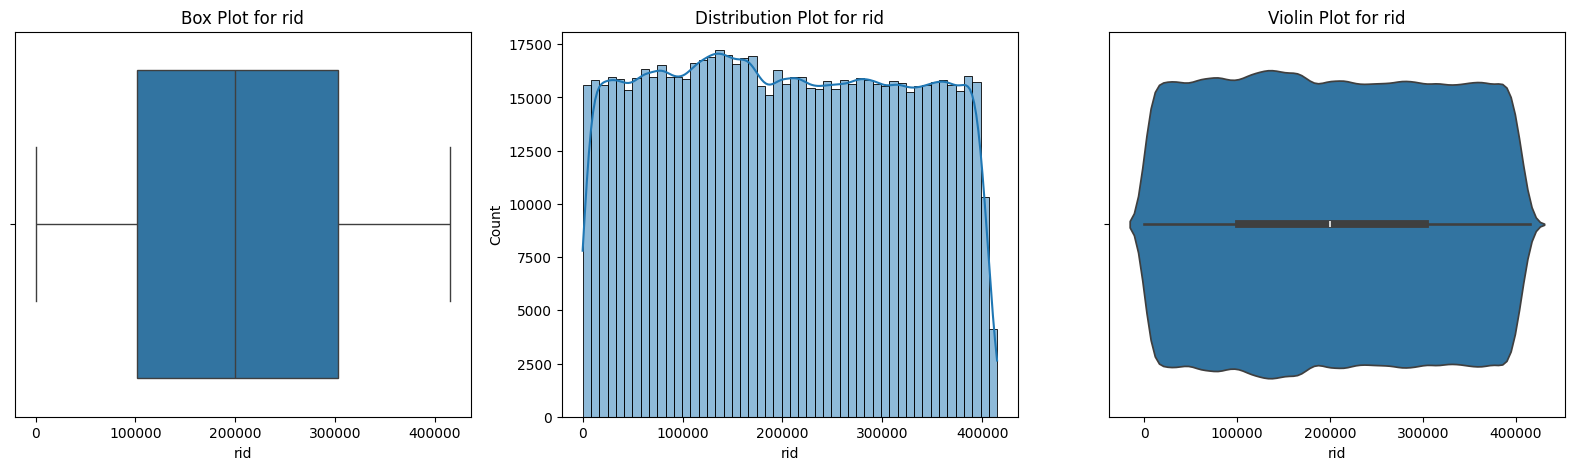

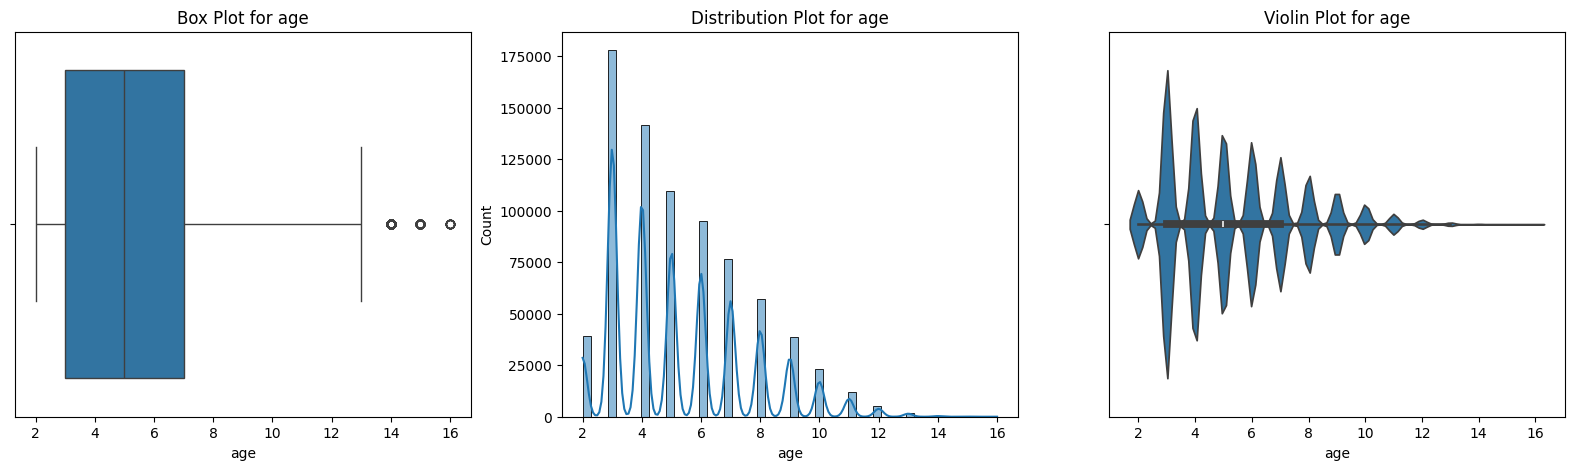

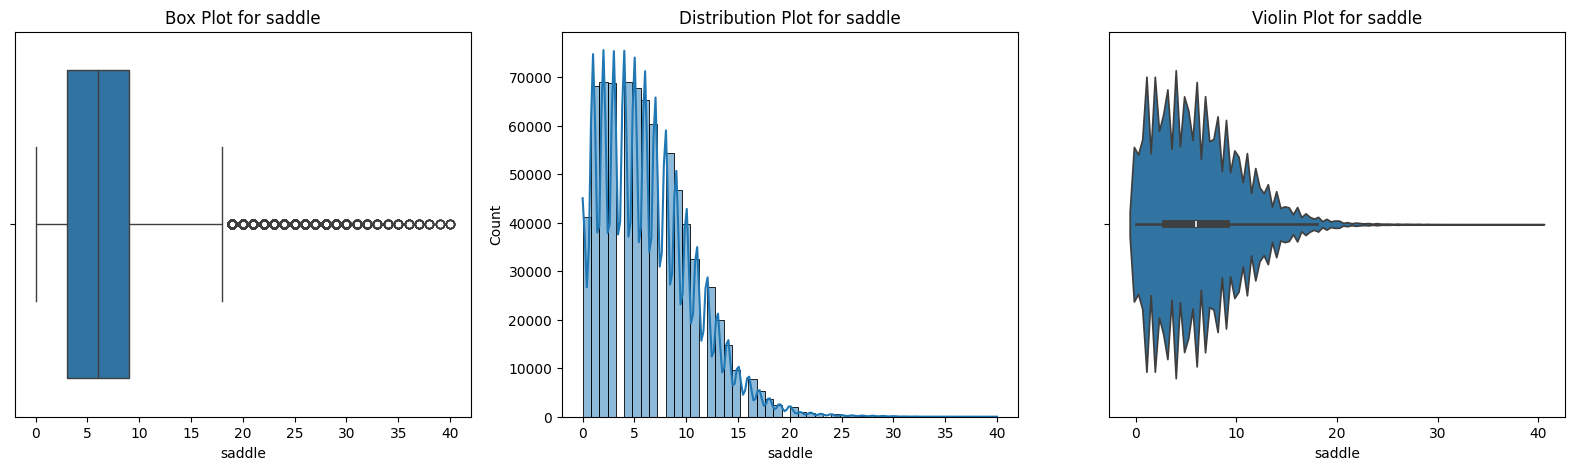

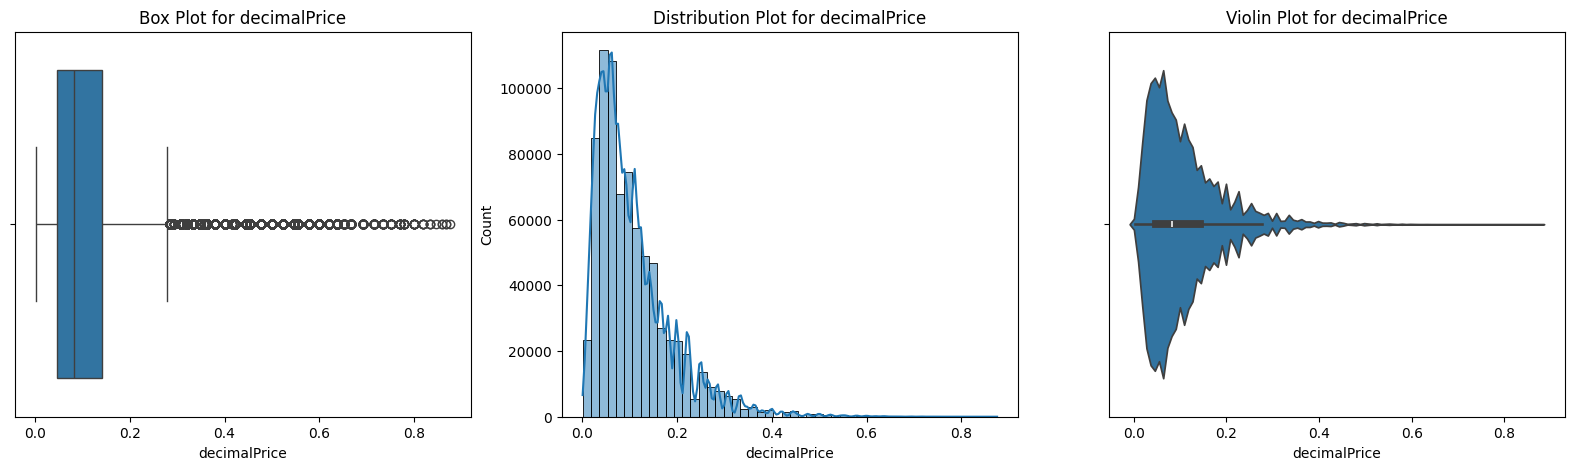

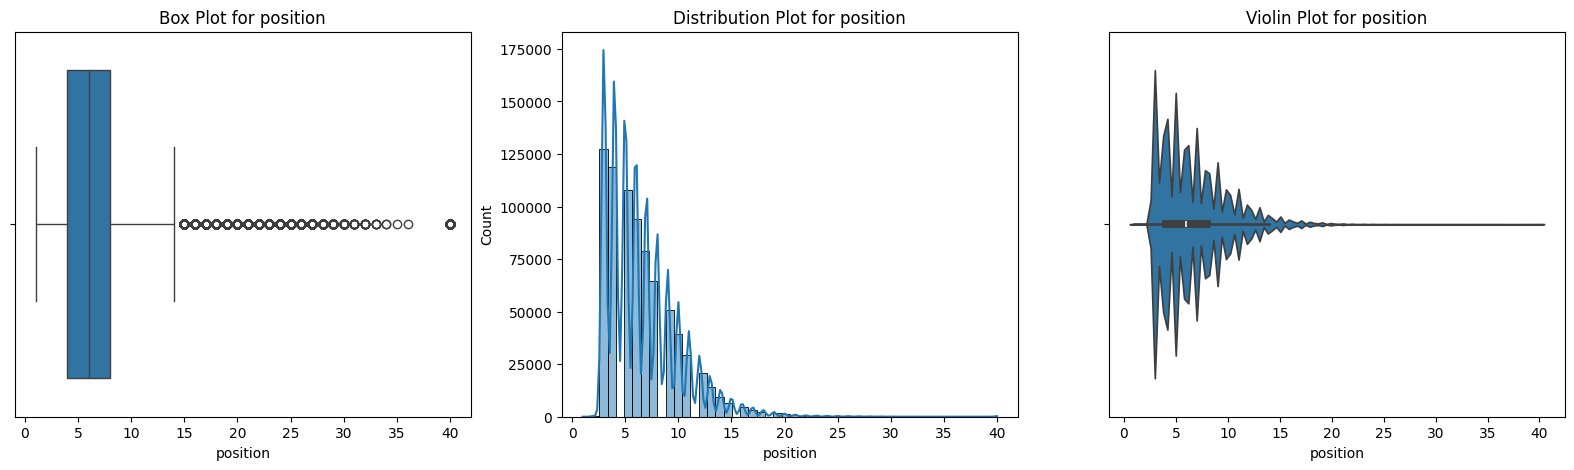

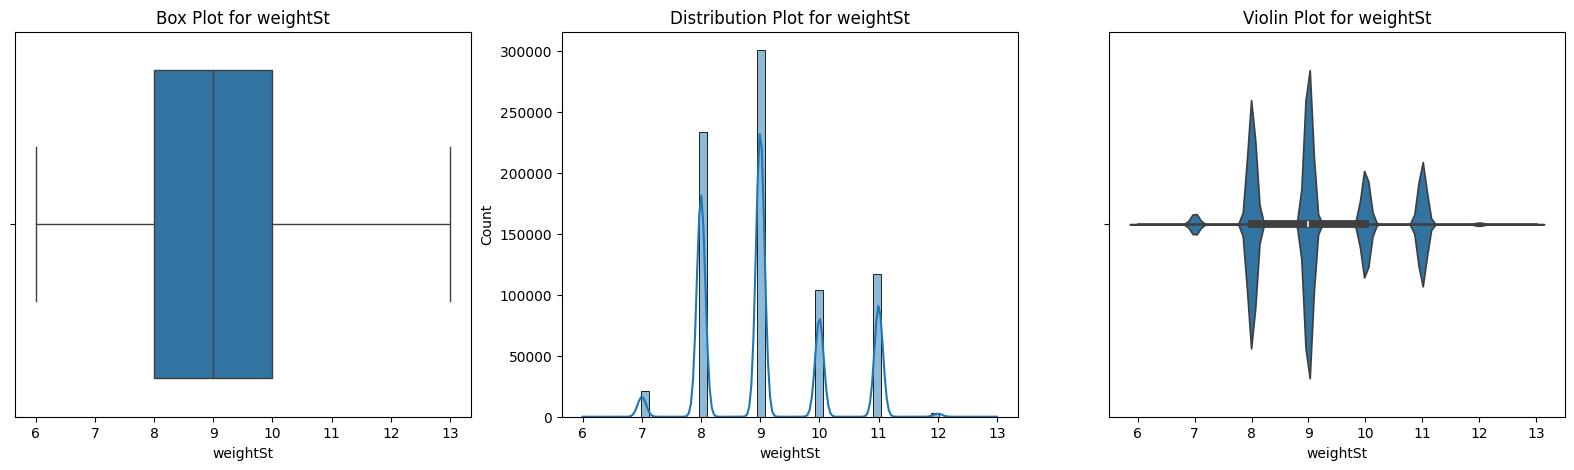

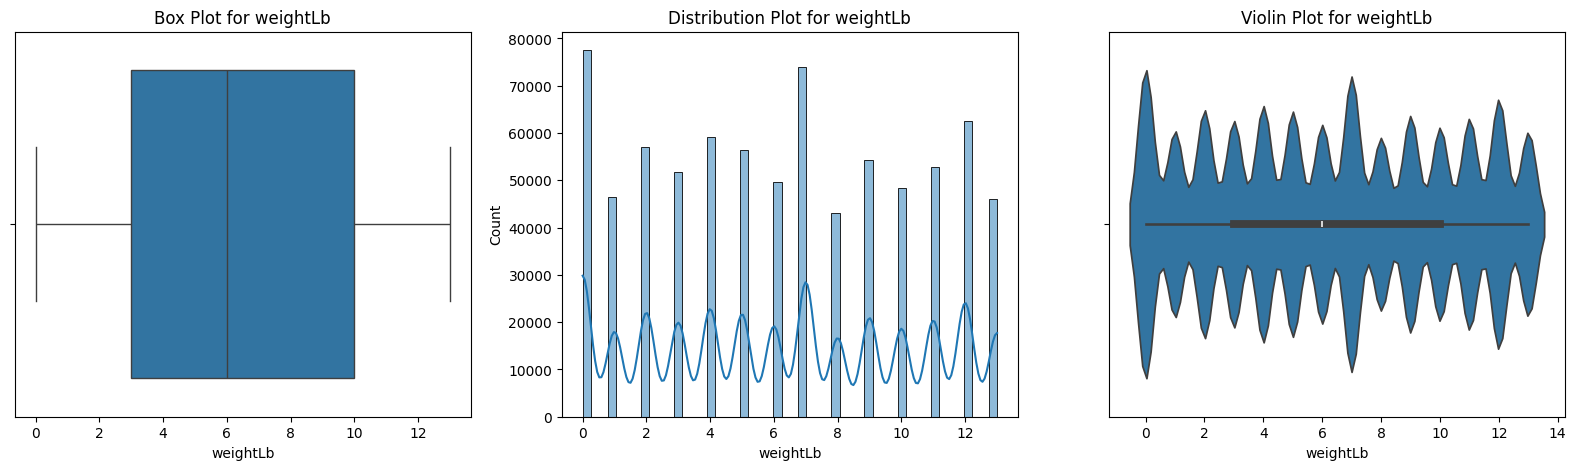

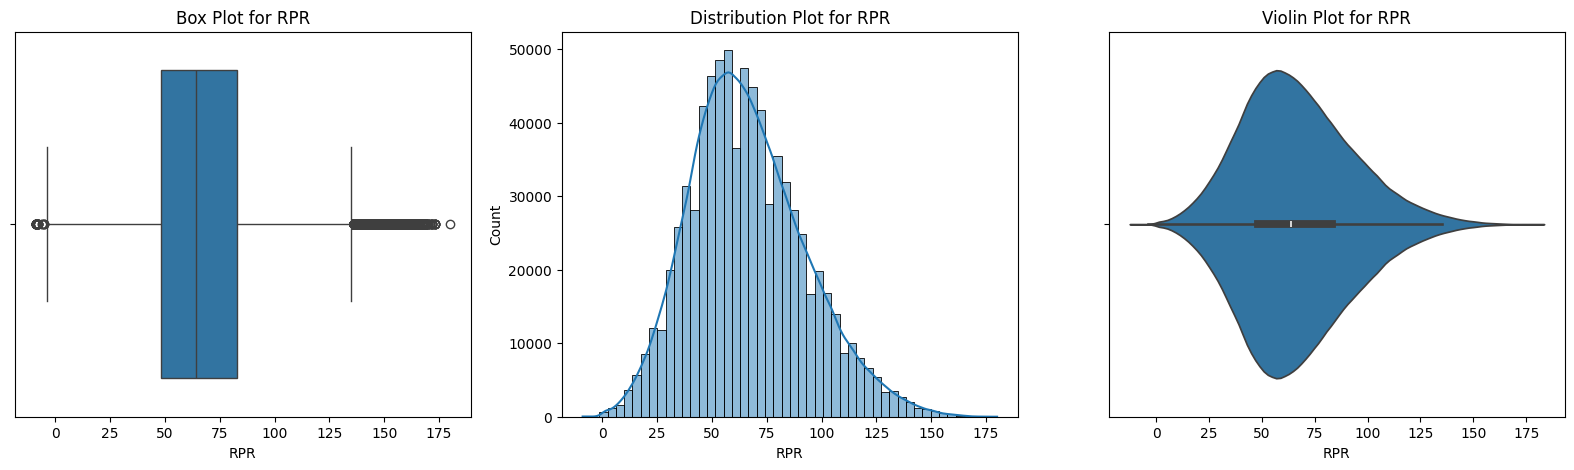

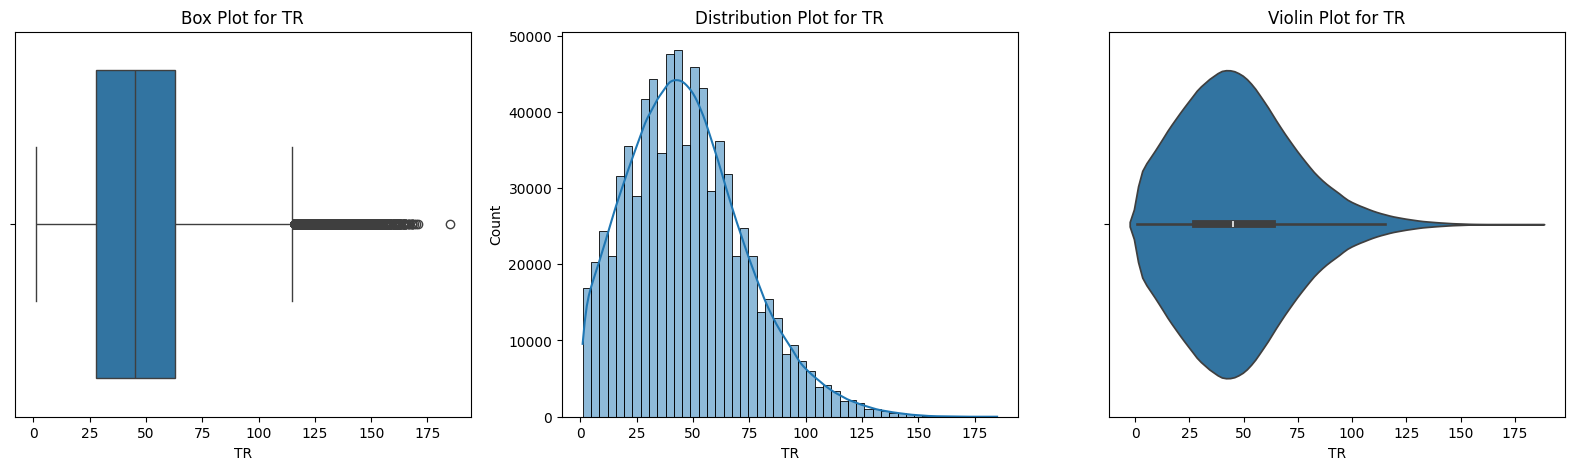

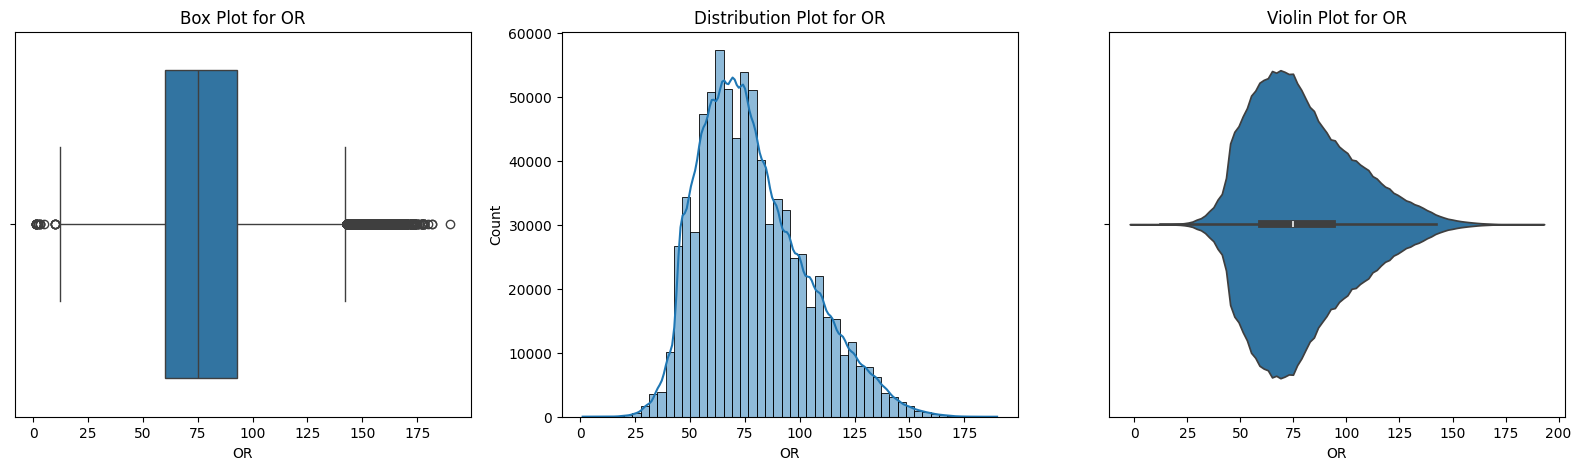

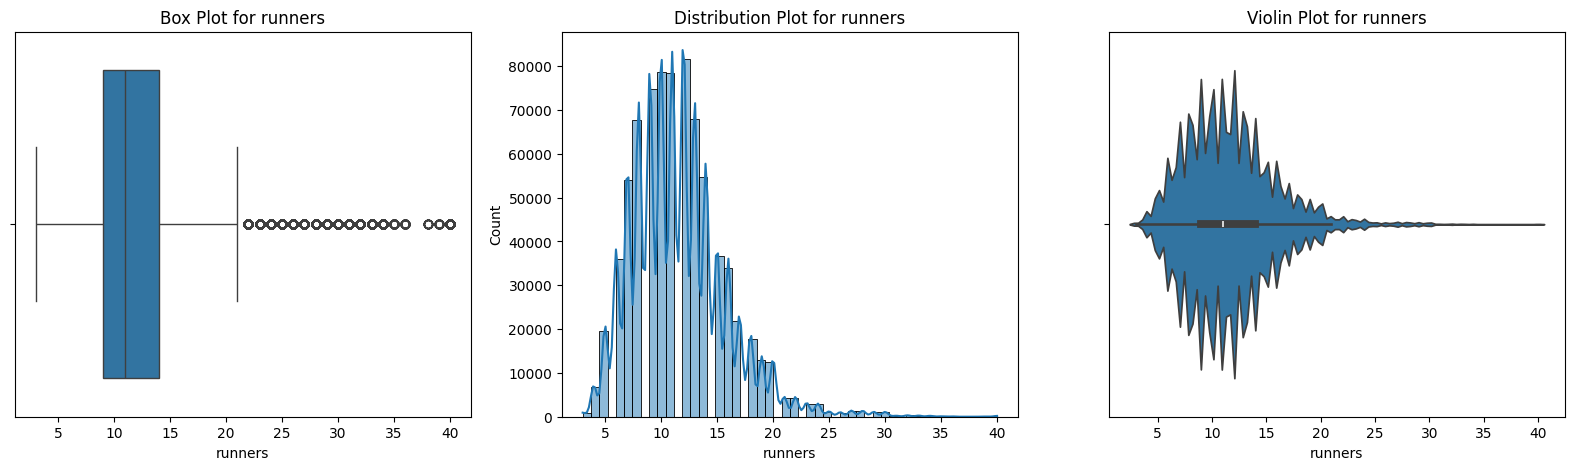

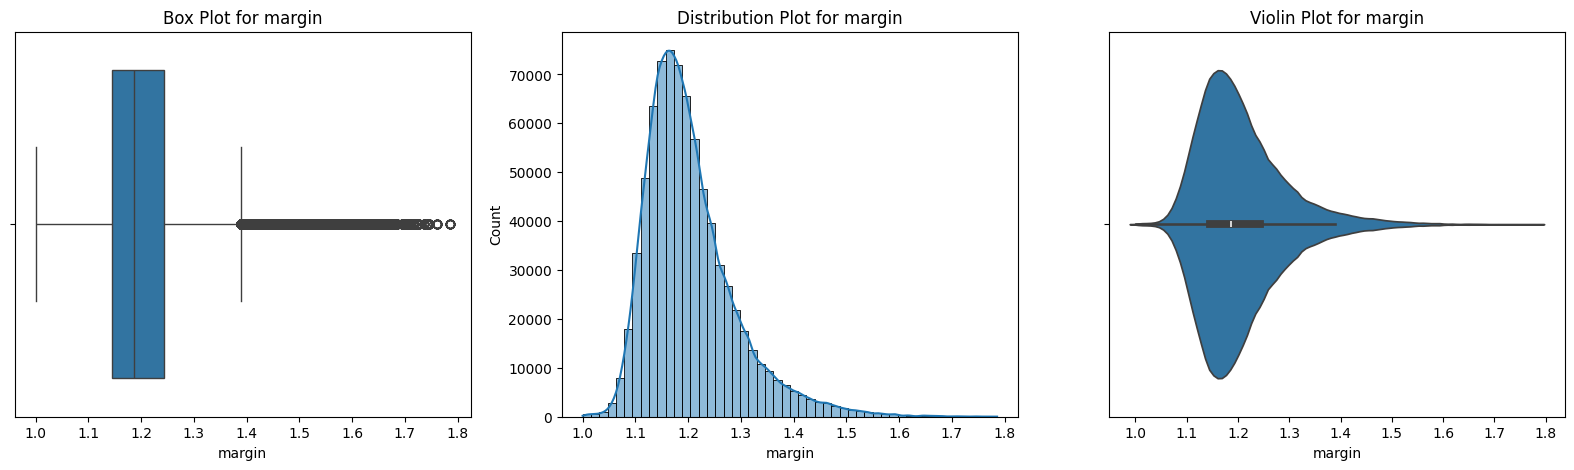

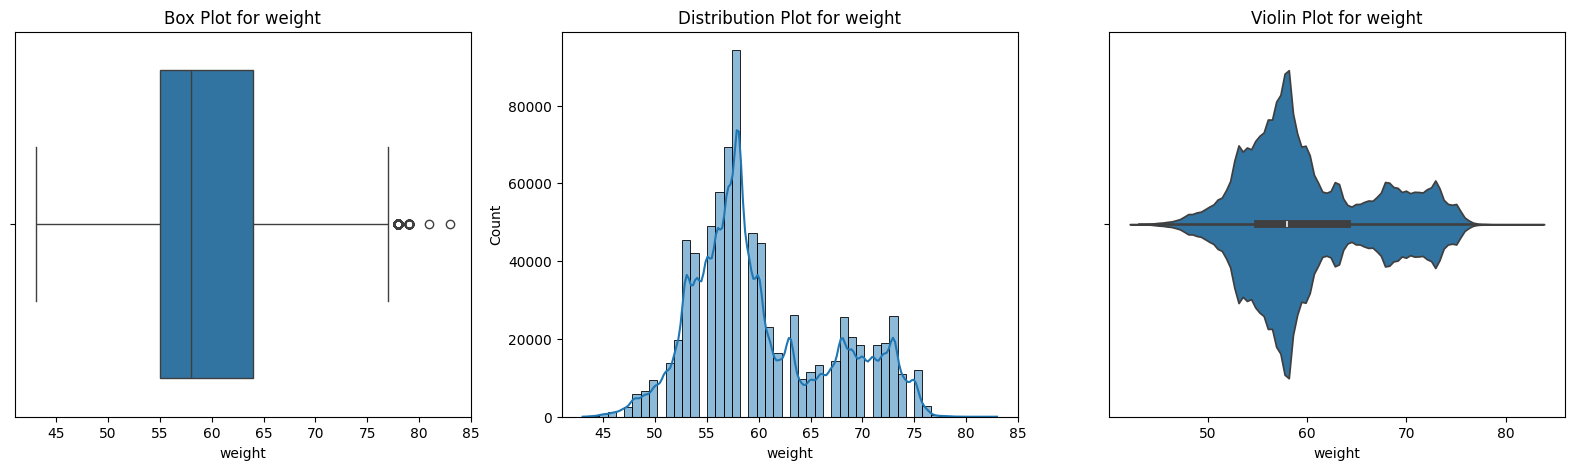

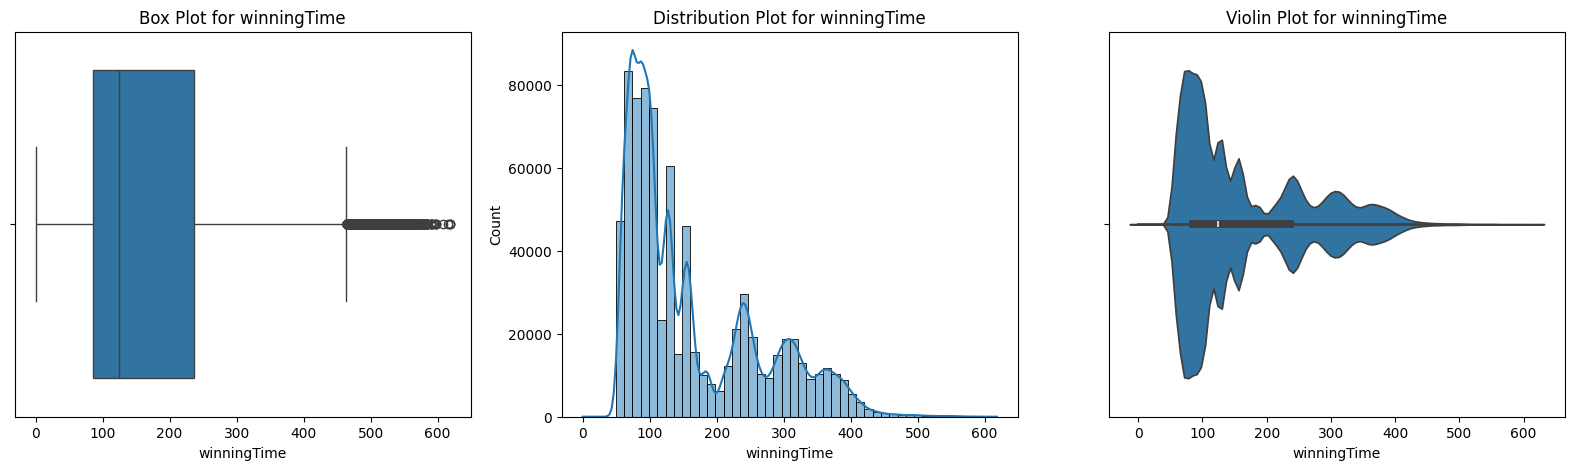

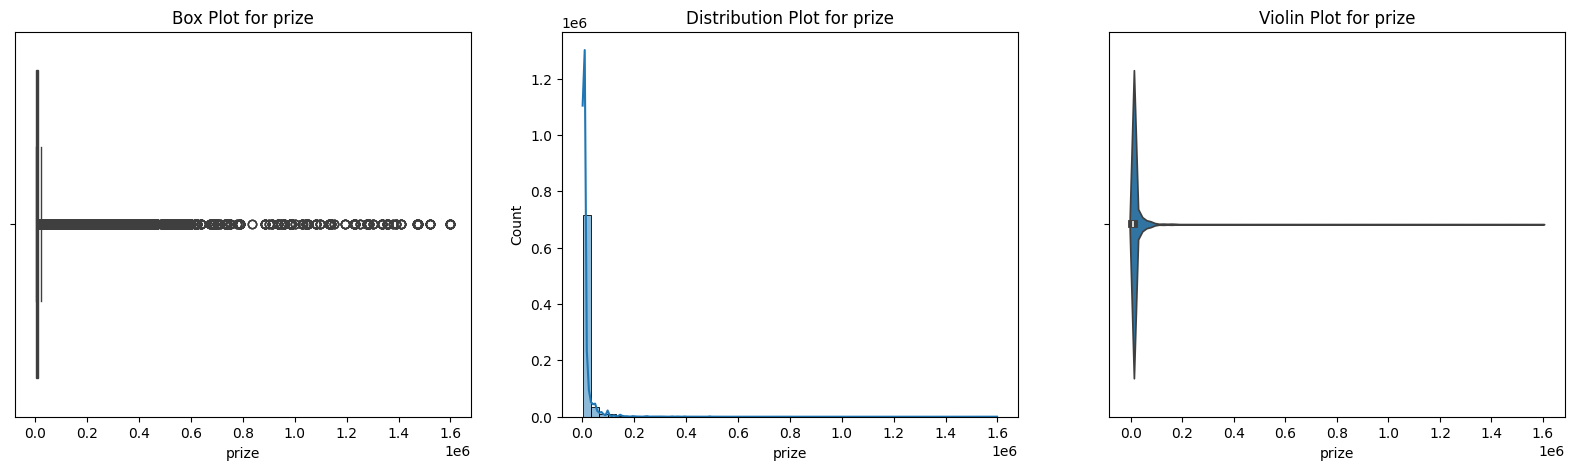

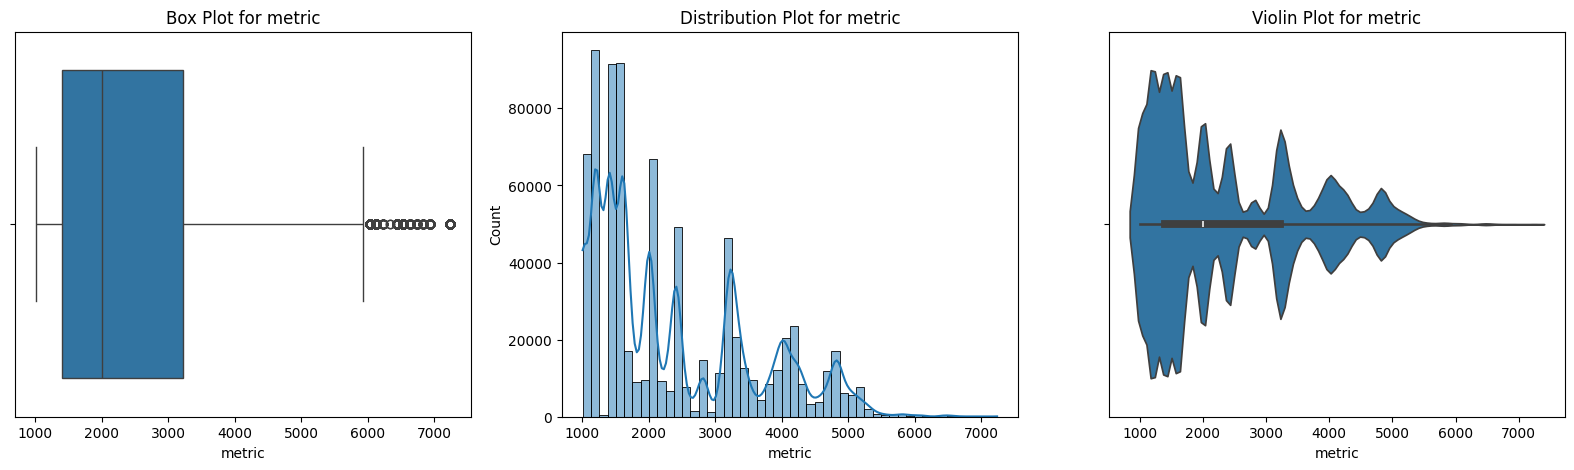

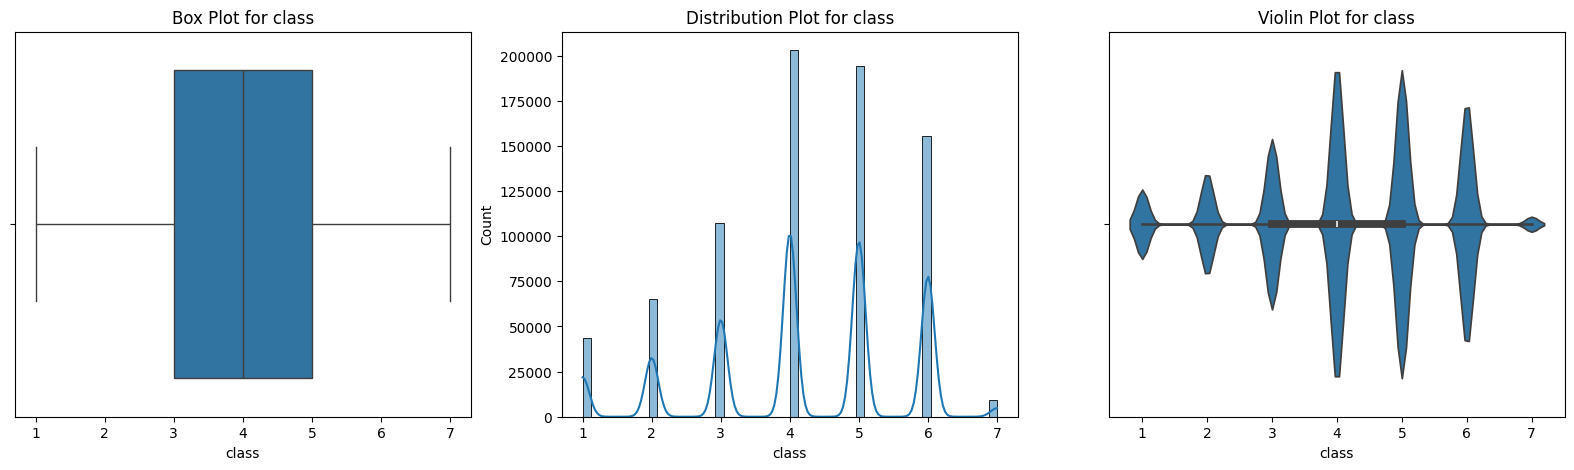

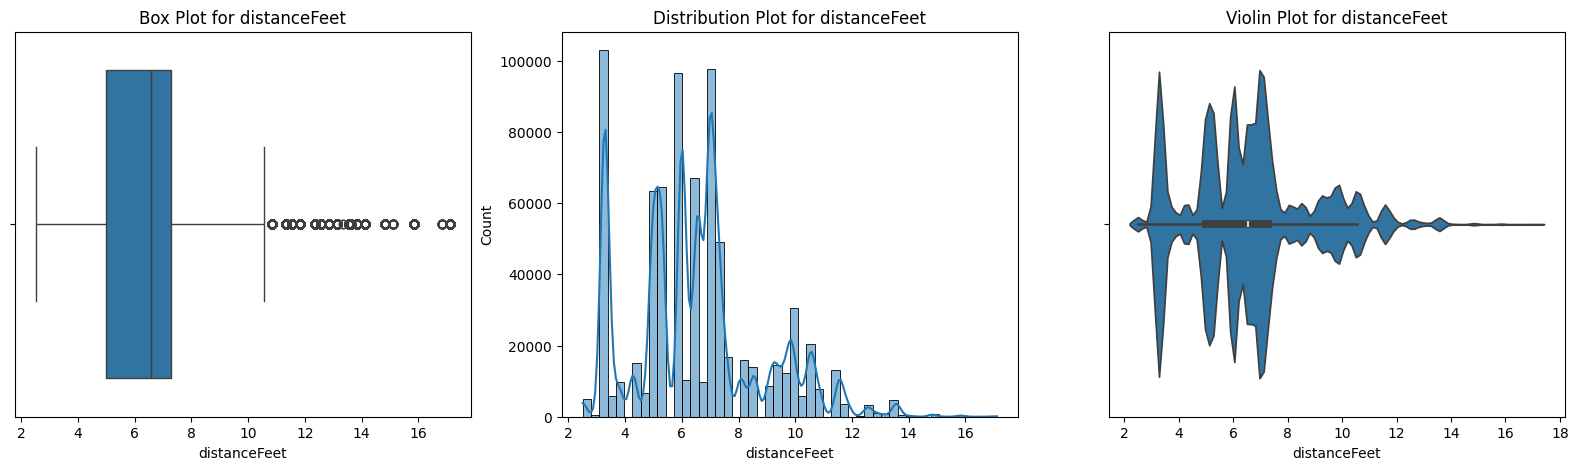

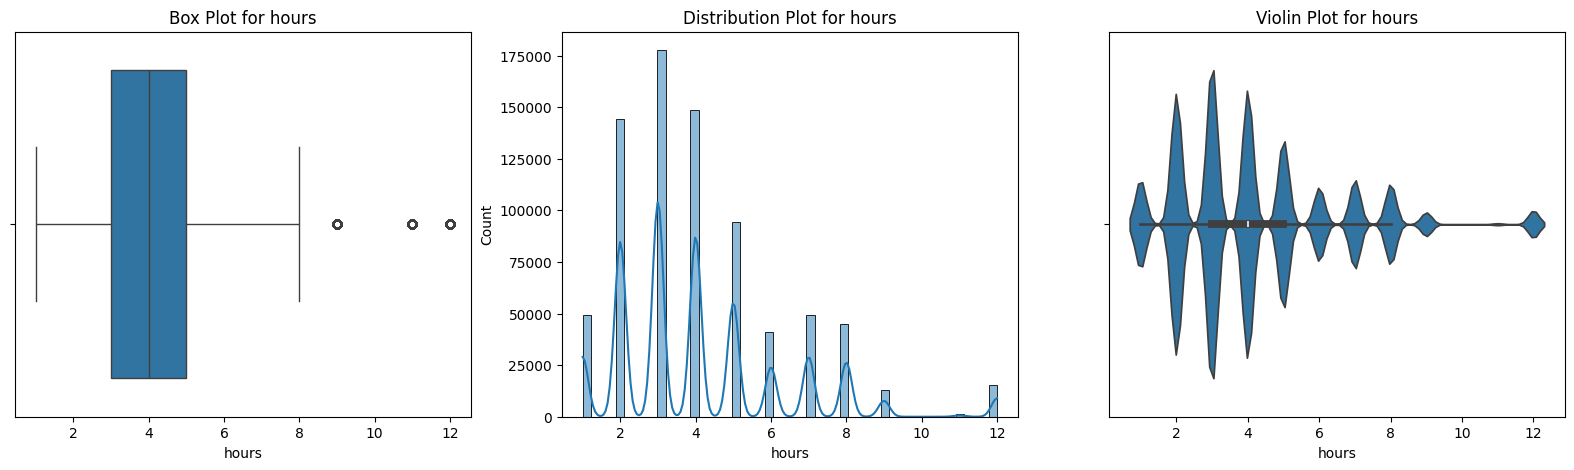

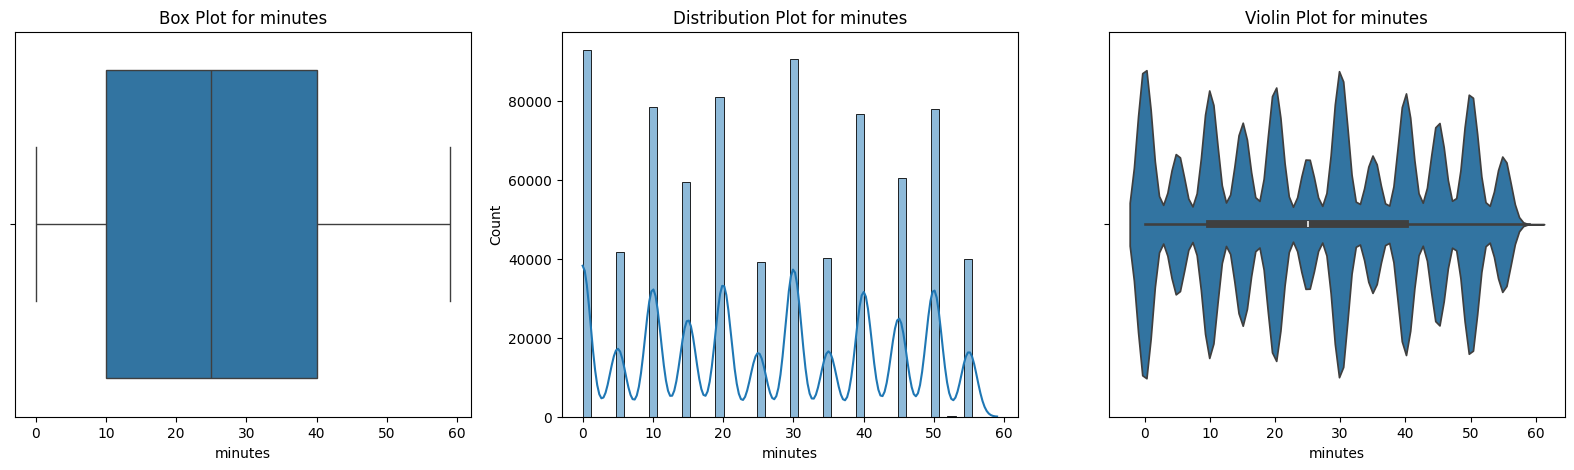

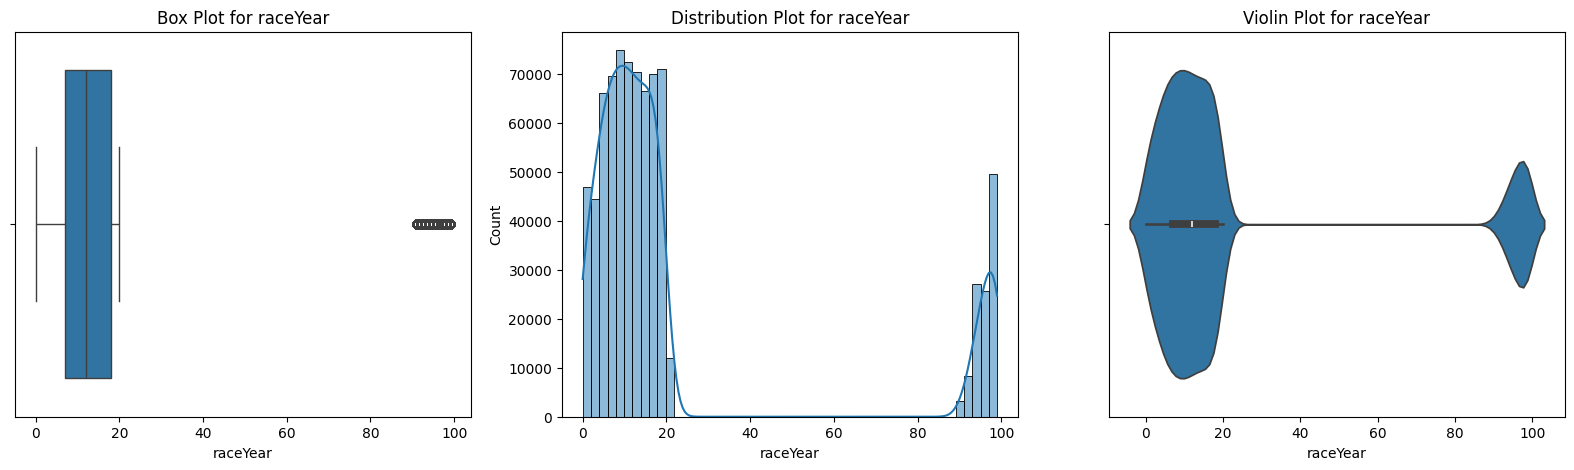

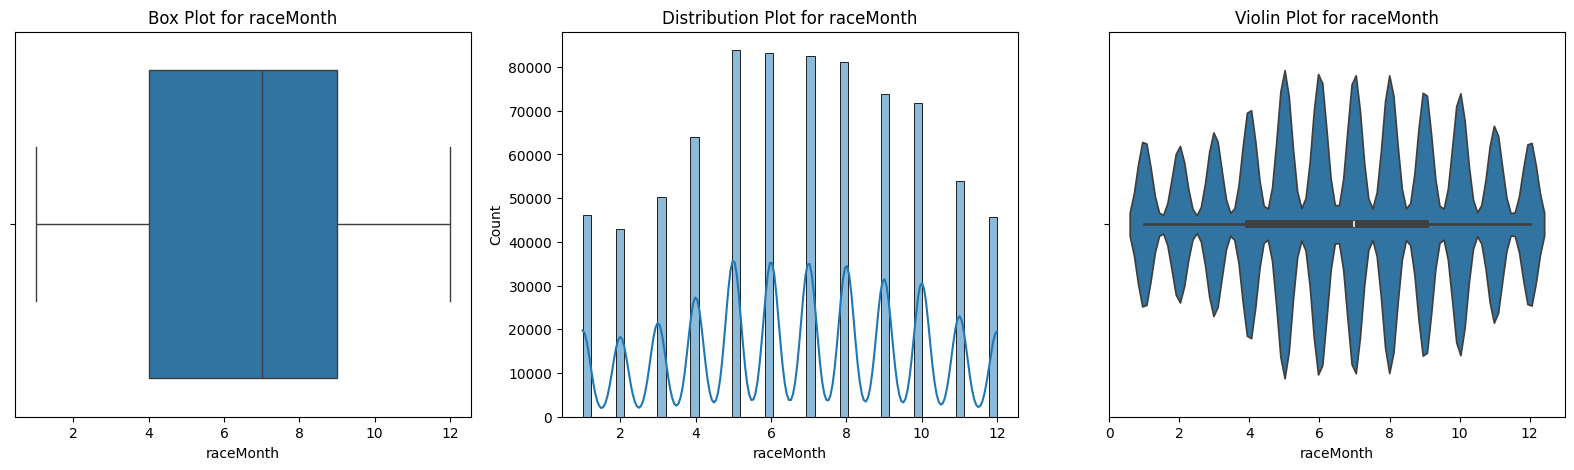

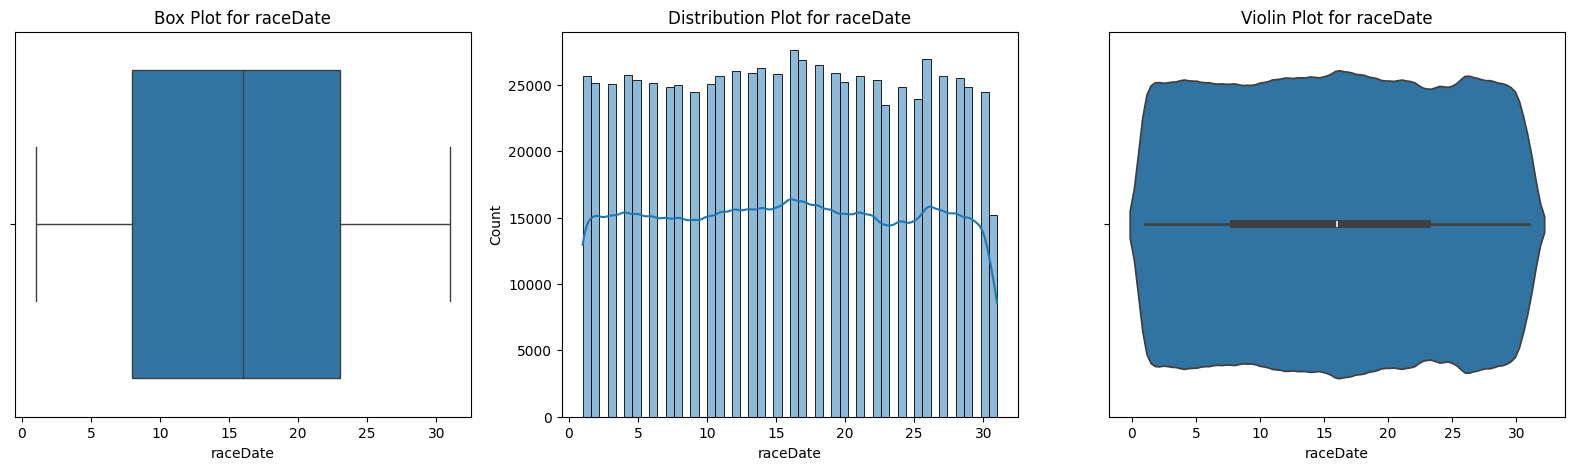

In [ ]:
for i in ['rid', 'age', 'saddle', 'decimalPrice','position','weightSt','weightLb','RPR','TR','OR','runners','margin','weight',
          'winningTime', 'prize', 'metric','class','distanceFeet','hours','minutes','raceYear','raceMonth','raceDate']:
    plot(merged_data, i)

In [70]:
columns = ['rid', 'age', 'saddle', 'decimalPrice','position','weightSt','weightLb','RPR','TR','OR','runners','margin','weight',
          'winningTime', 'prize', 'metric','class','distanceFeet','hours','minutes','raceYear','raceMonth','raceDate']

for column in columns:
    mask = merged_data[column] <= 0
    print(f'{column}: {mask.sum()}')
    merged_data.loc[mask, column] = np.nan

rid: 4
age: 0
saddle: 41124
decimalPrice: 0
position: 0
weightSt: 0
weightLb: 77551
RPR: 82
TR: 0
OR: 0
runners: 0
margin: 0
weight: 0
winningTime: 5
prize: 0
metric: 0
class: 0
distanceFeet: 0
hours: 0
minutes: 92864
raceYear: 25690
raceMonth: 0
raceDate: 0


In [71]:
merged_data.isnull().sum()

rid                 4
horseName           0
age                 0
saddle          41124
decimalPrice        0
trainerName         0
jockeyName          0
position            0
positionL           0
dist                0
weightSt            0
weightLb        77551
RPR                82
TR                  0
OR                  0
father              0
mother              0
gfather             0
runners             0
margin              0
weight              0
res_win             0
res_place           0
course              0
title               0
rclass              0
ages                0
condition           0
winningTime         5
prize               0
metric              0
countryCode         0
ncond               0
class               0
distanceFeet        0
hours               0
minutes         92864
raceYear        25690
raceMonth           0
raceDate            0
dtype: int64

In [72]:
merged_data.dropna(inplace=True)
merged_data.reset_index(drop=True,inplace=True)
len(merged_data)

566799

In [73]:
columns = ['rid', 'age', 'saddle', 'decimalPrice','position','weightSt','weightLb','RPR','TR','OR','runners','margin','weight',
          'winningTime', 'prize', 'metric','class','distanceFeet','hours','minutes','raceYear','raceMonth','raceDate']

for column in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = merged_data[column].quantile(0.25)
    Q3 = merged_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_mask = (merged_data[column] < lower_bound) | (merged_data[column] > upper_bound)
    print(f'Column: {column}, Outliers: {outliers_mask.sum()}')

    # Replace outliers with NaN
    merged_data.loc[outliers_mask, column] = np.nan

Column: rid, Outliers: 0
Column: age, Outliers: 384
Column: saddle, Outliers: 6332
Column: decimalPrice, Outliers: 25189
Column: position, Outliers: 15777
Column: weightSt, Outliers: 0
Column: weightLb, Outliers: 0
Column: RPR, Outliers: 4867
Column: TR, Outliers: 8038
Column: OR, Outliers: 4047
Column: runners, Outliers: 11812
Column: margin, Outliers: 20455
Column: weight, Outliers: 2
Column: winningTime, Outliers: 1655
Column: prize, Outliers: 67936
Column: metric, Outliers: 1329
Column: class, Outliers: 0
Column: distanceFeet, Outliers: 26656
Column: hours, Outliers: 13064
Column: minutes, Outliers: 0
Column: raceYear, Outliers: 55284
Column: raceMonth, Outliers: 0
Column: raceDate, Outliers: 0


In [74]:
merged_data.isnull().sum()

rid                 0
horseName           0
age               384
saddle           6332
decimalPrice    25189
trainerName         0
jockeyName          0
position        15777
positionL           0
dist                0
weightSt            0
weightLb            0
RPR              4867
TR               8038
OR               4047
father              0
mother              0
gfather             0
runners         11812
margin          20455
weight              2
res_win             0
res_place           0
course              0
title               0
rclass              0
ages                0
condition           0
winningTime      1655
prize           67936
metric           1329
countryCode         0
ncond               0
class               0
distanceFeet    26656
hours           13064
minutes             0
raceYear        55284
raceMonth           0
raceDate            0
dtype: int64

In [75]:
merged_data.dropna(inplace=True)
merged_data.reset_index(drop=True,inplace=True)
len(merged_data)

384238

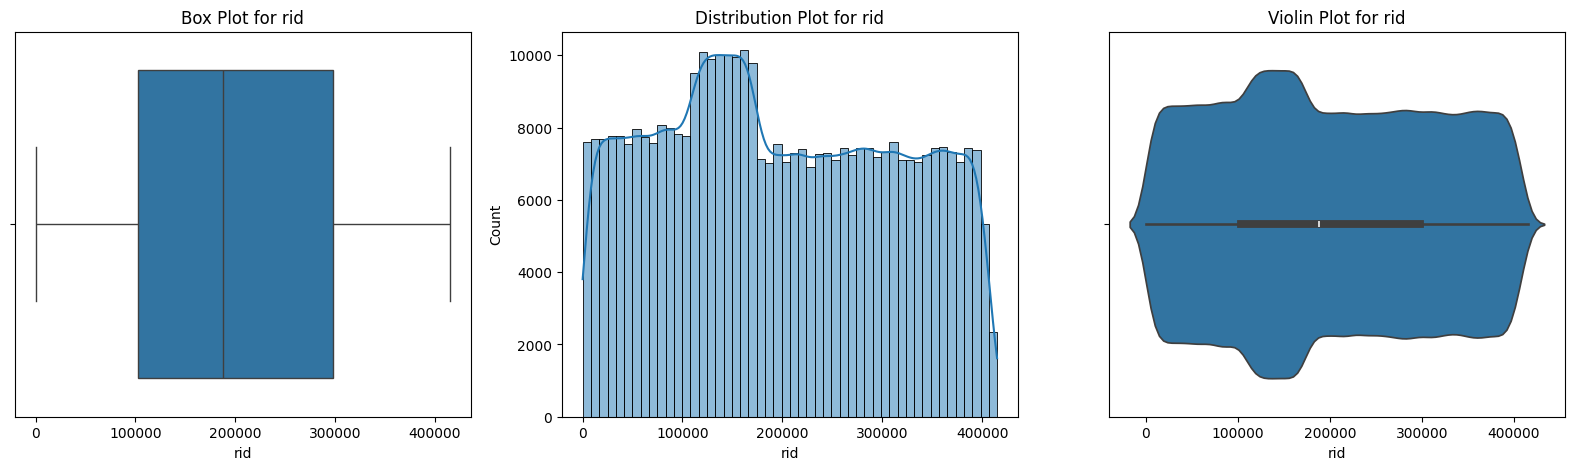

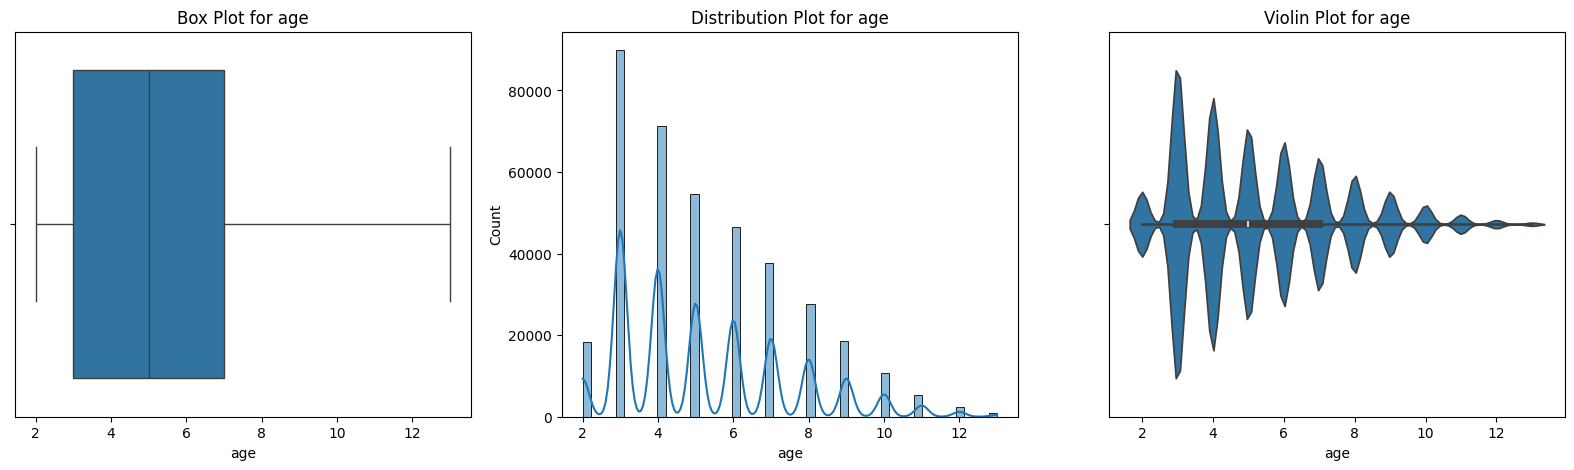

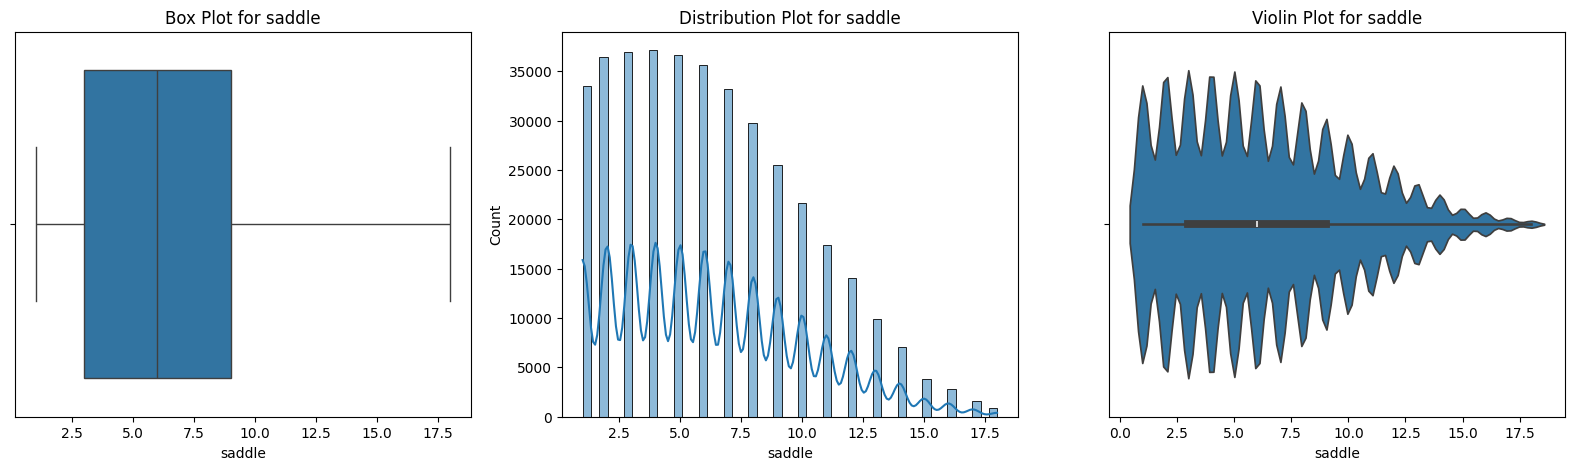

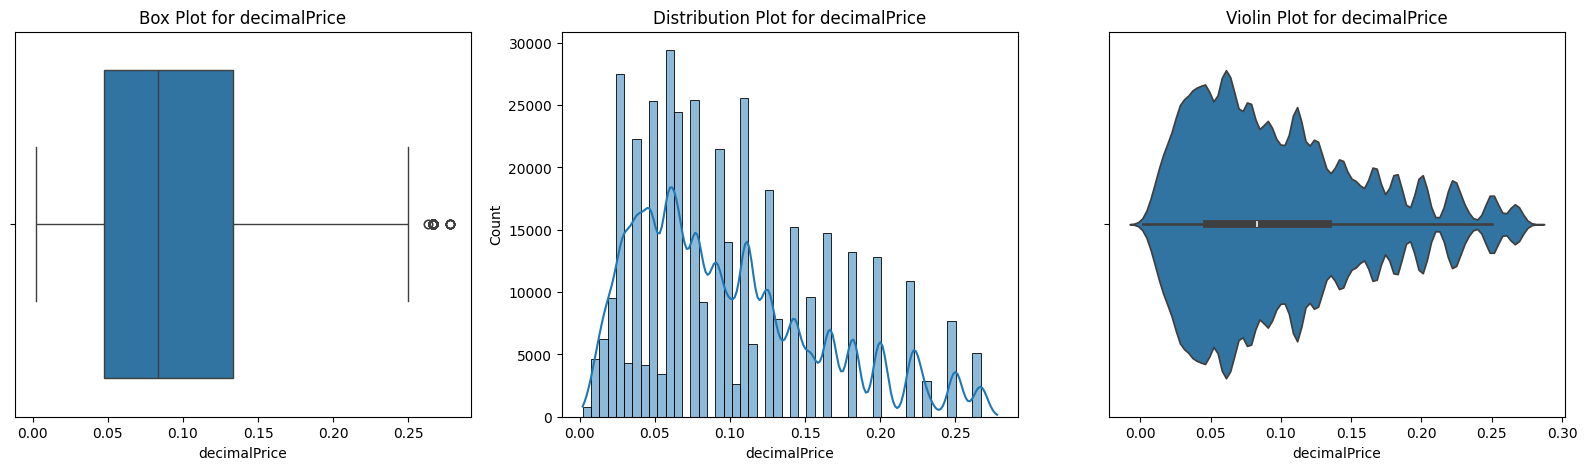

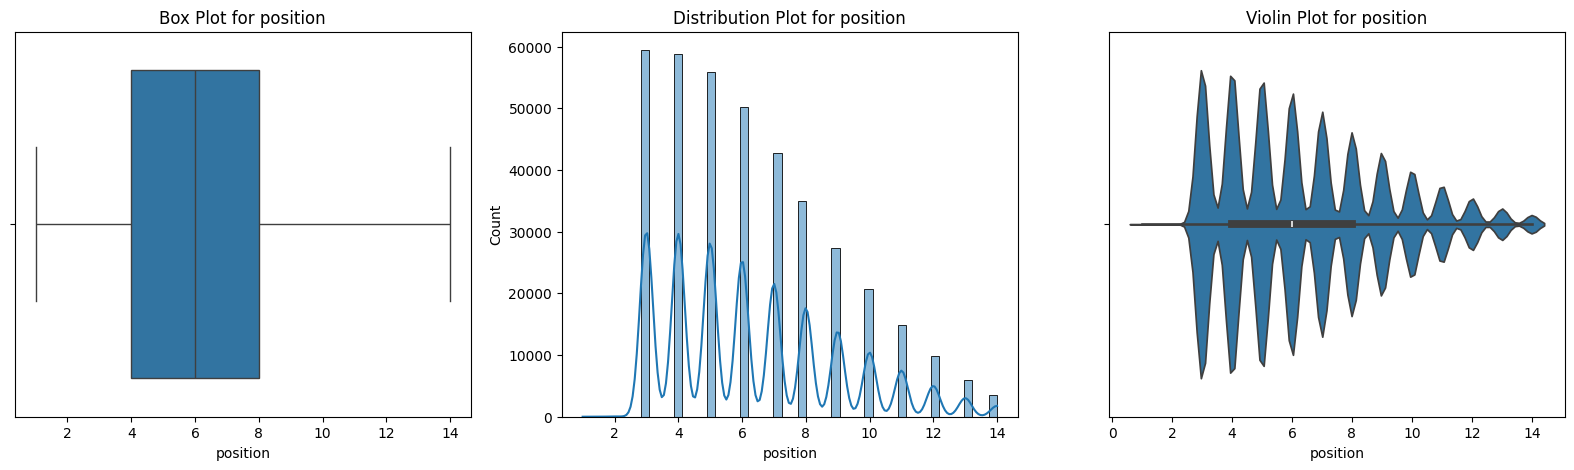

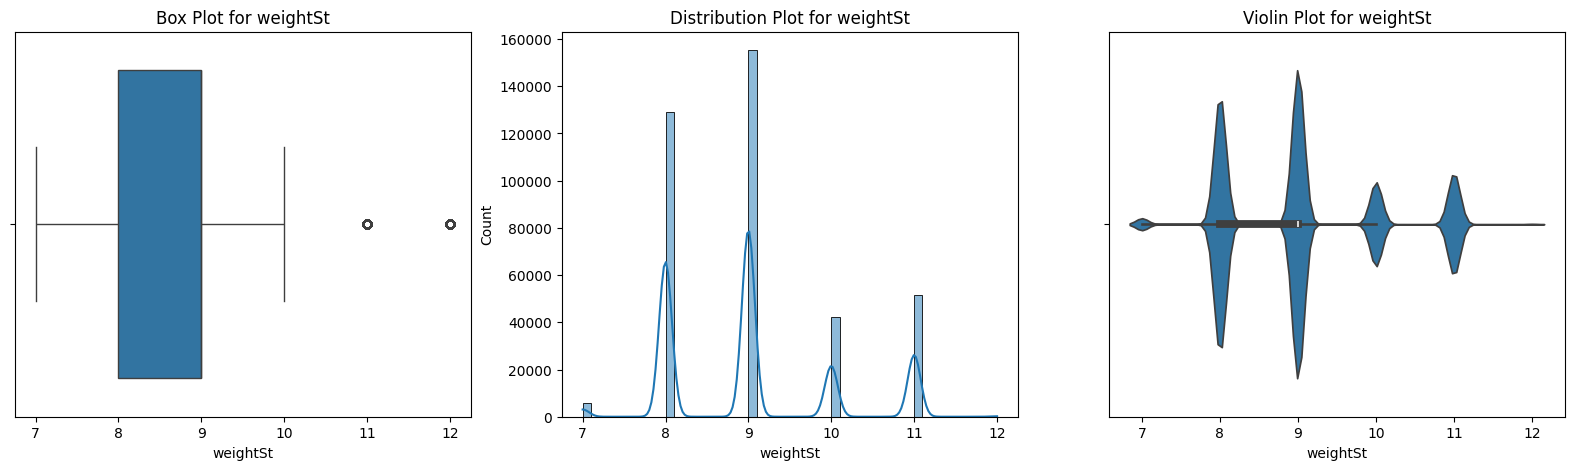

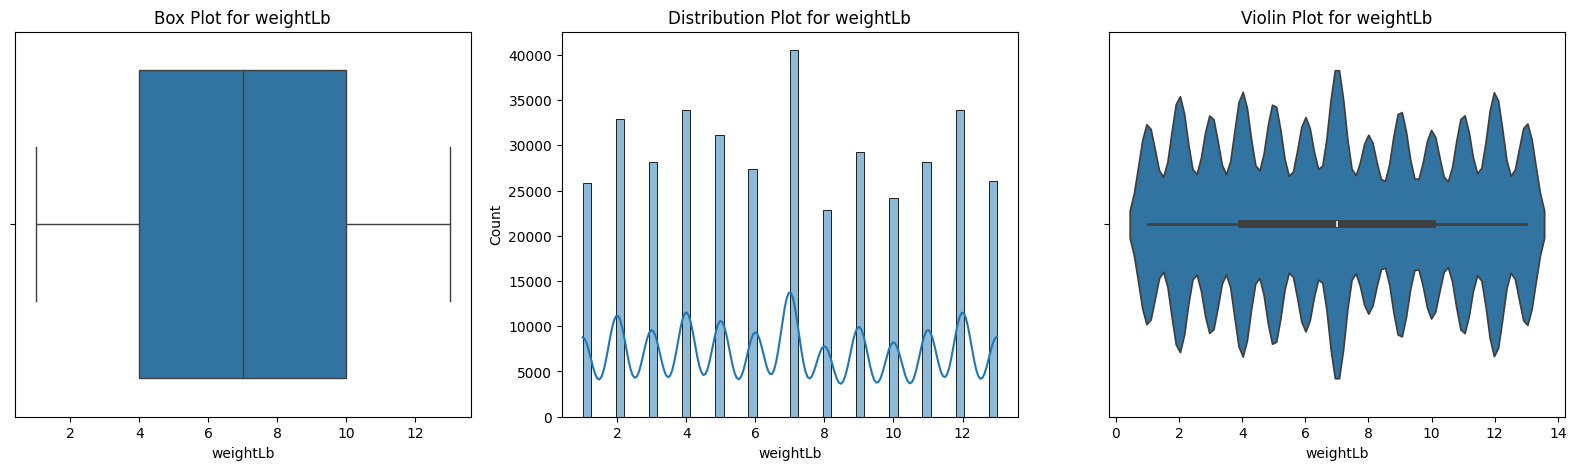

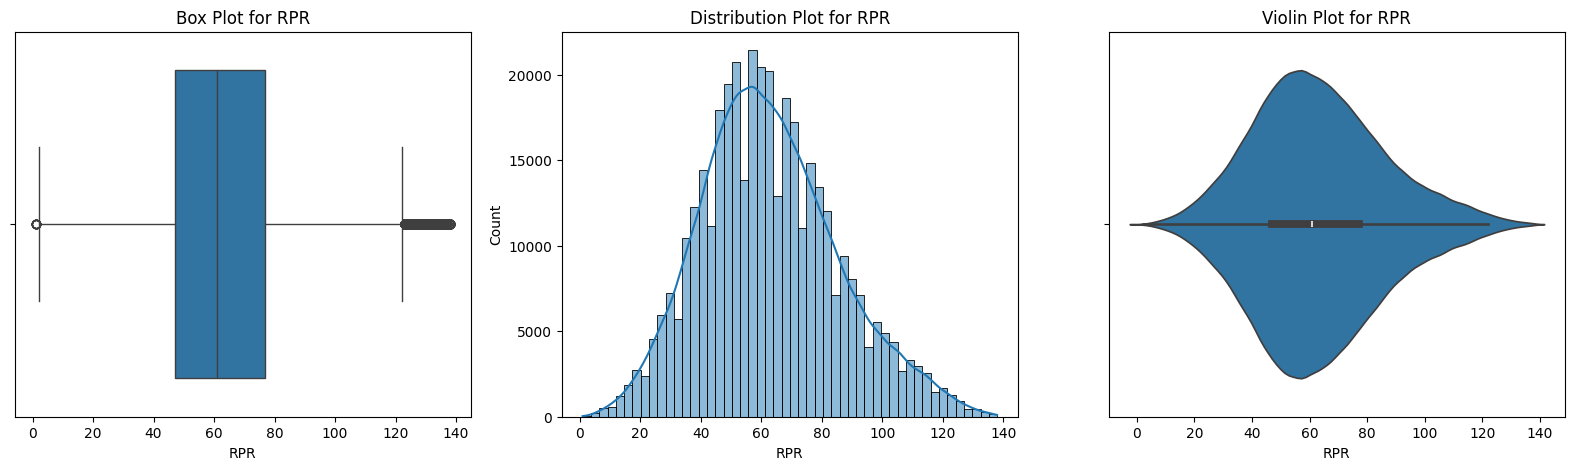

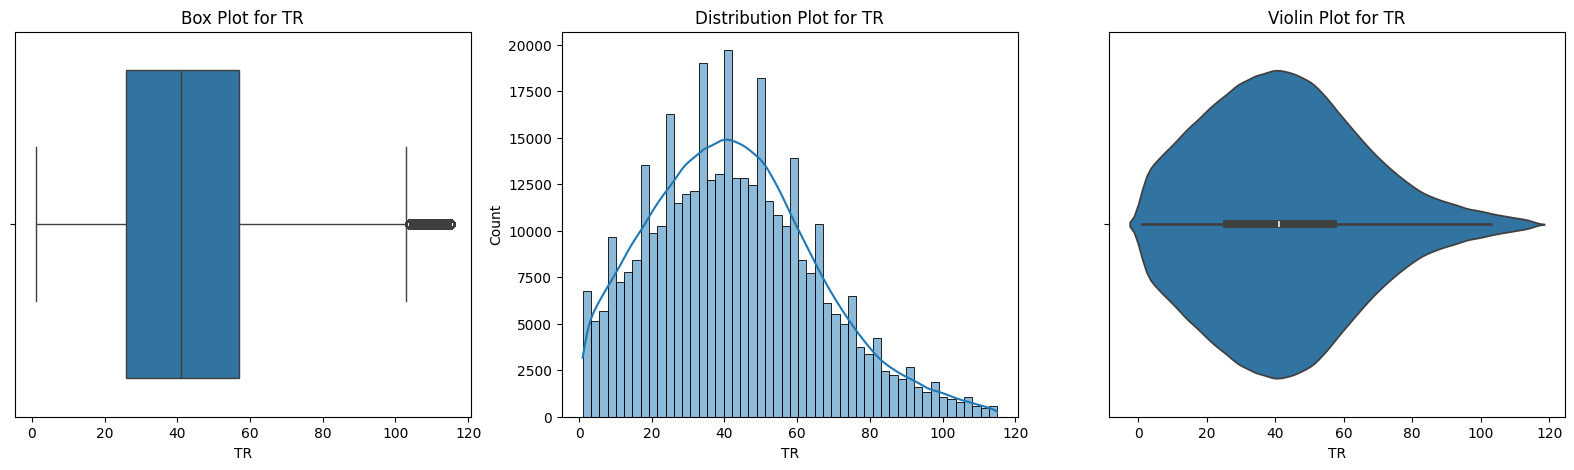

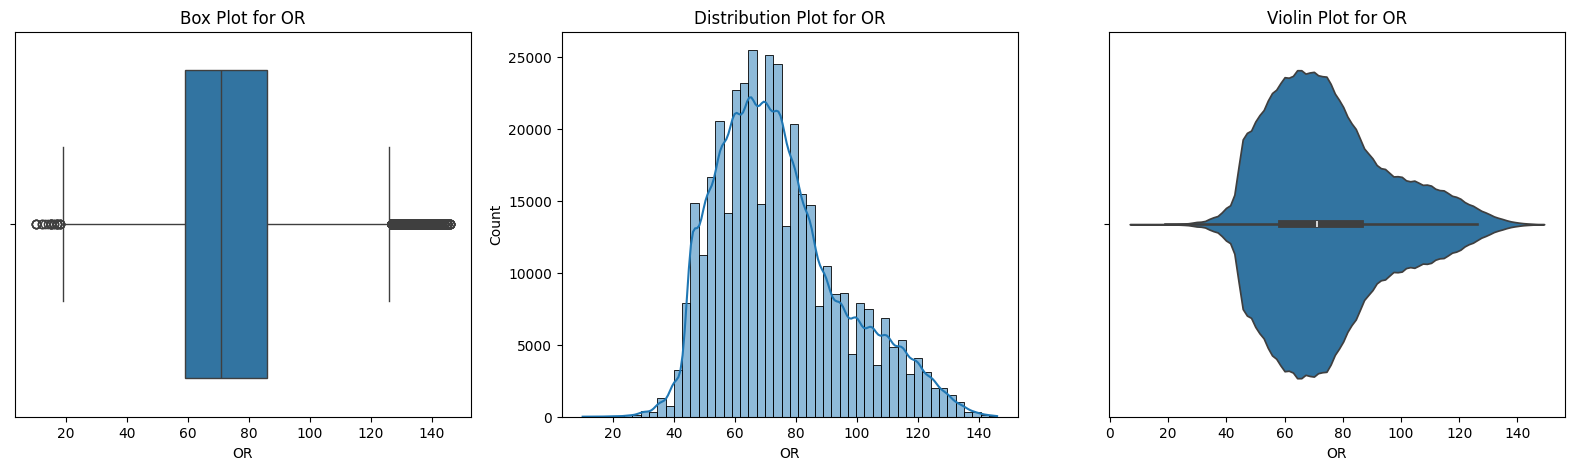

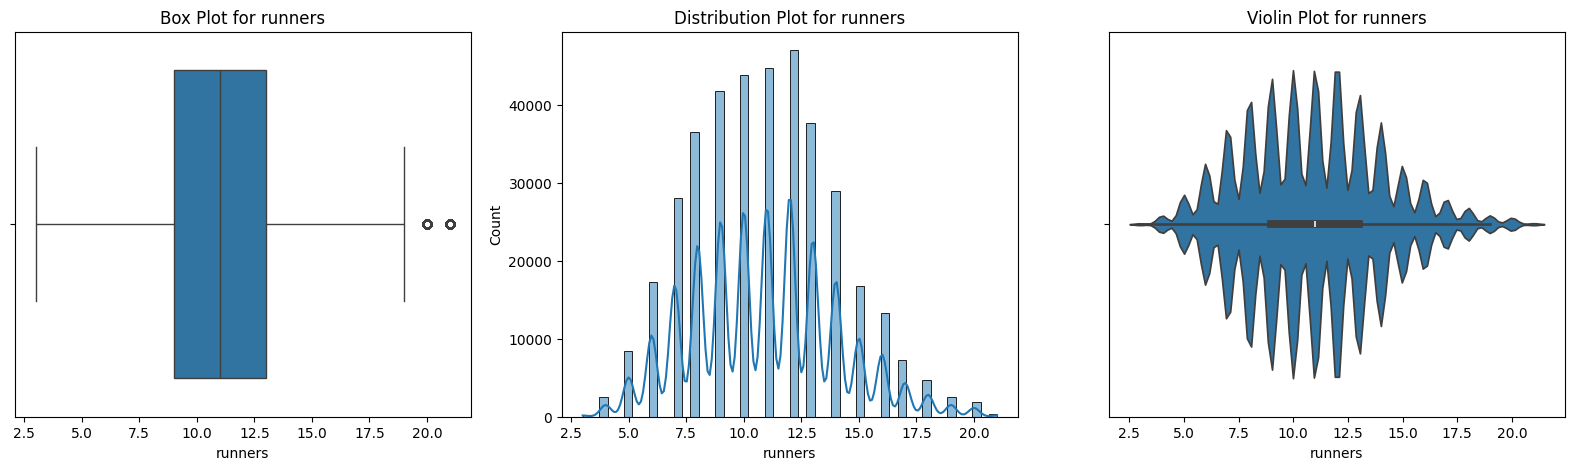

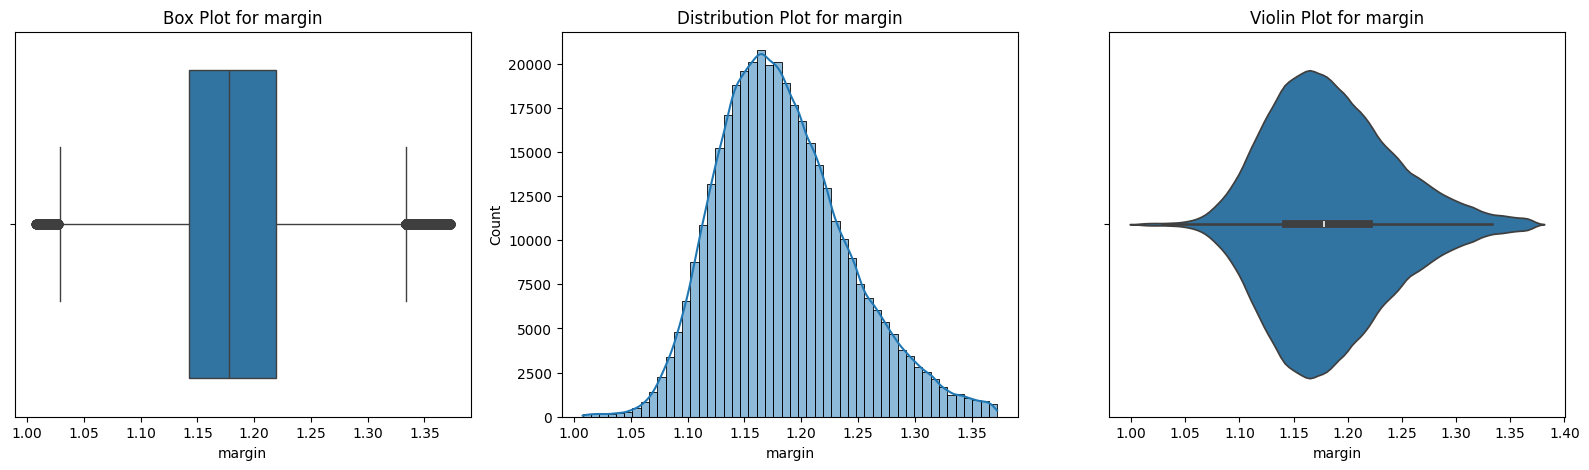

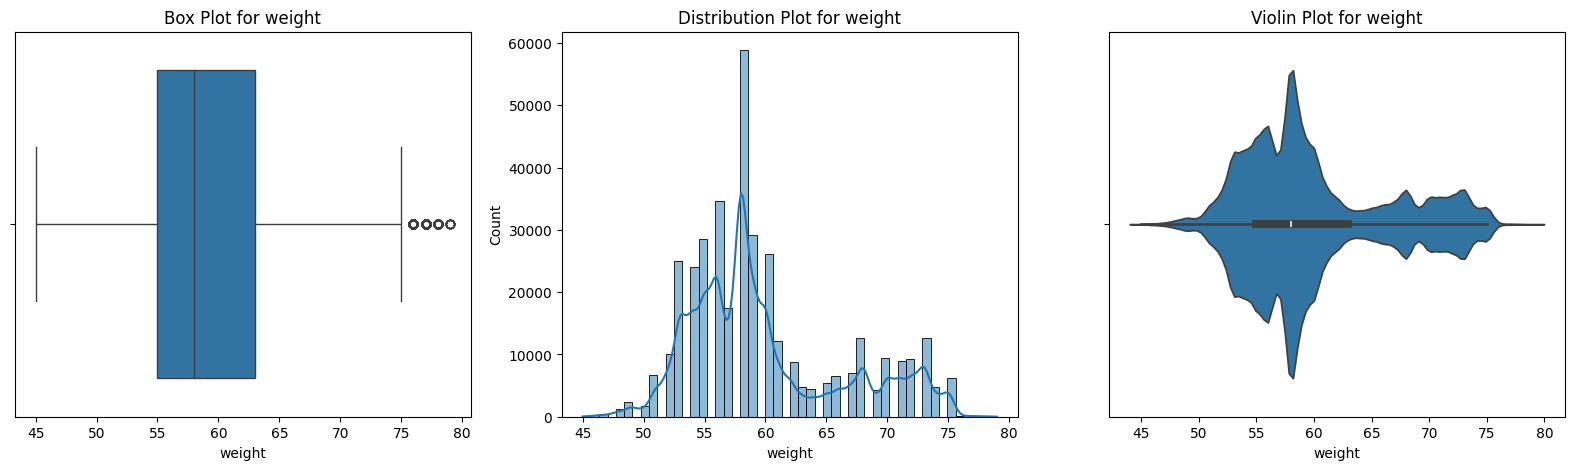

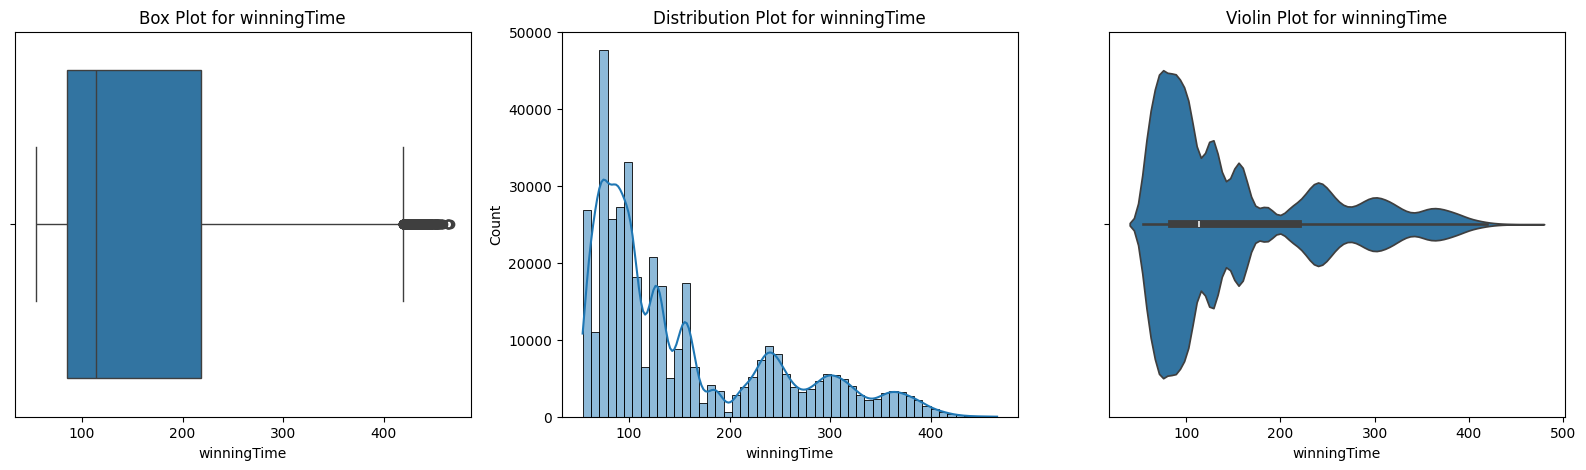

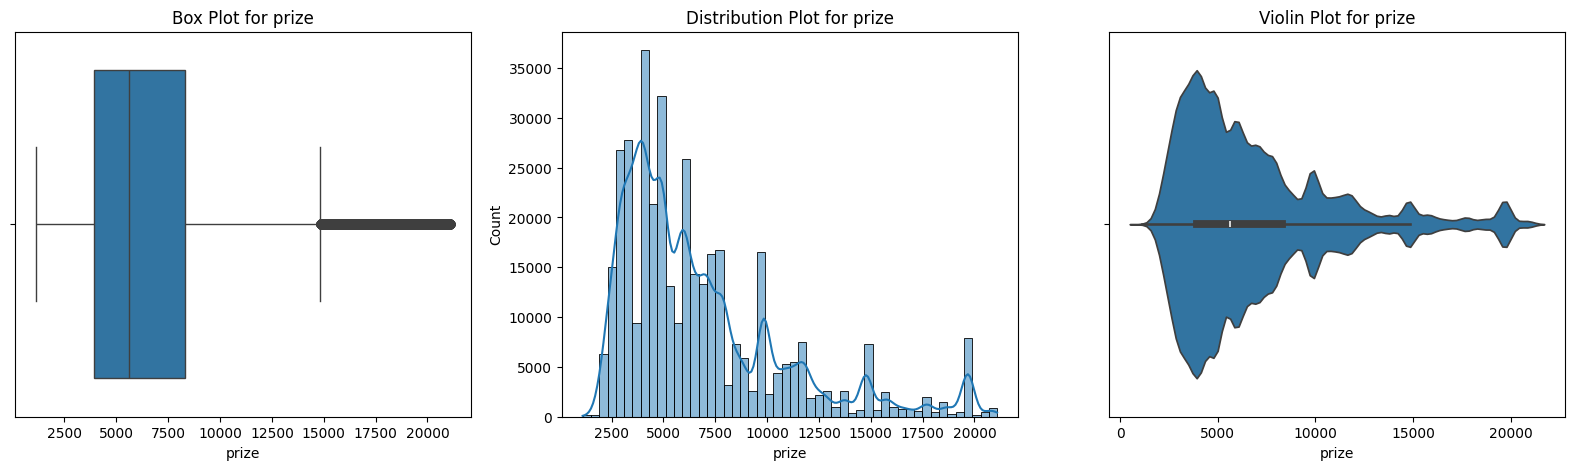

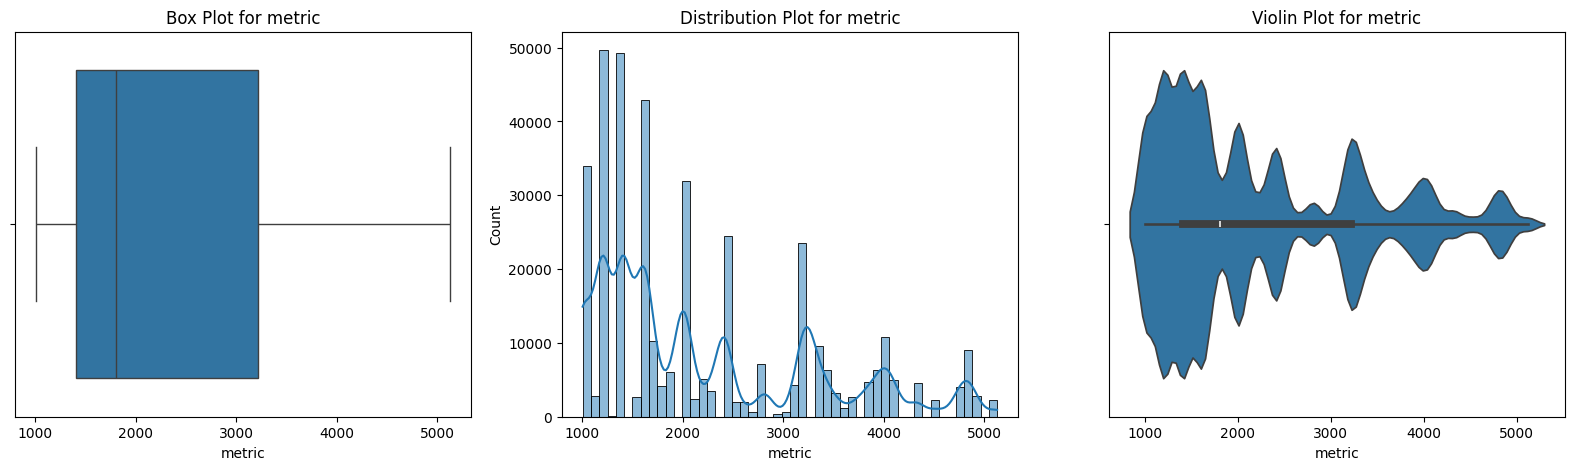

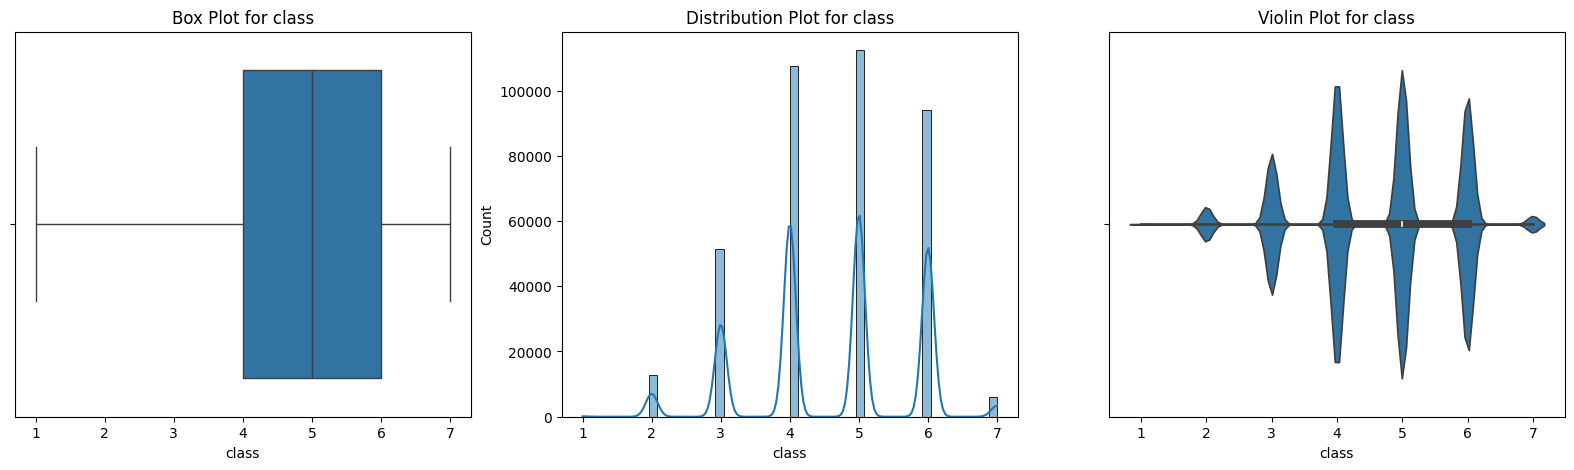

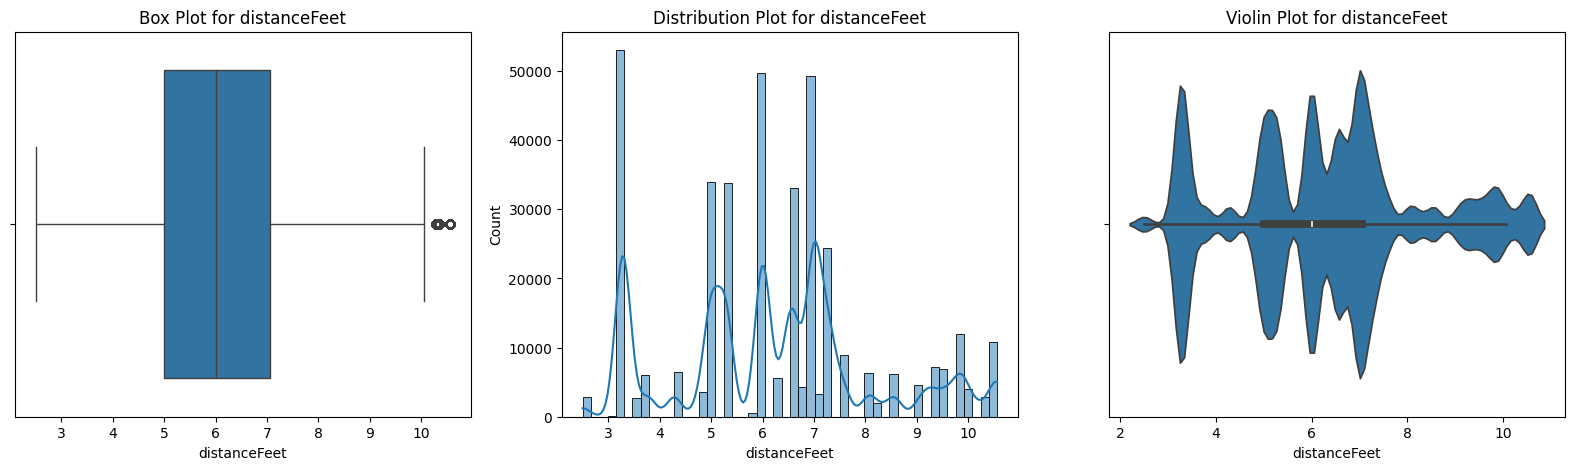

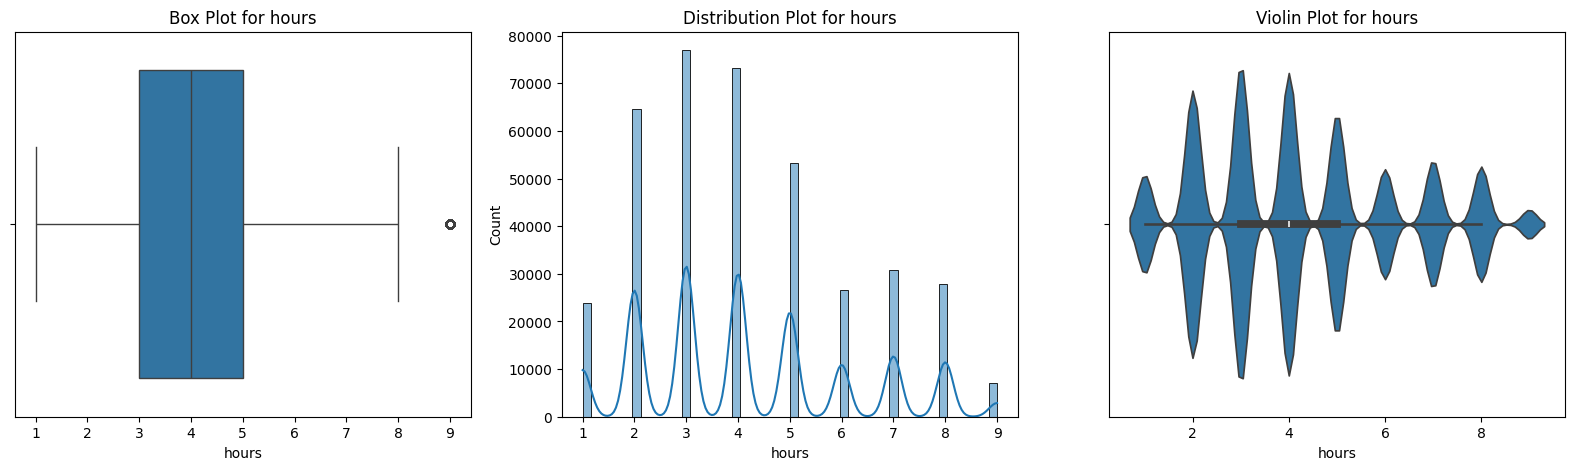

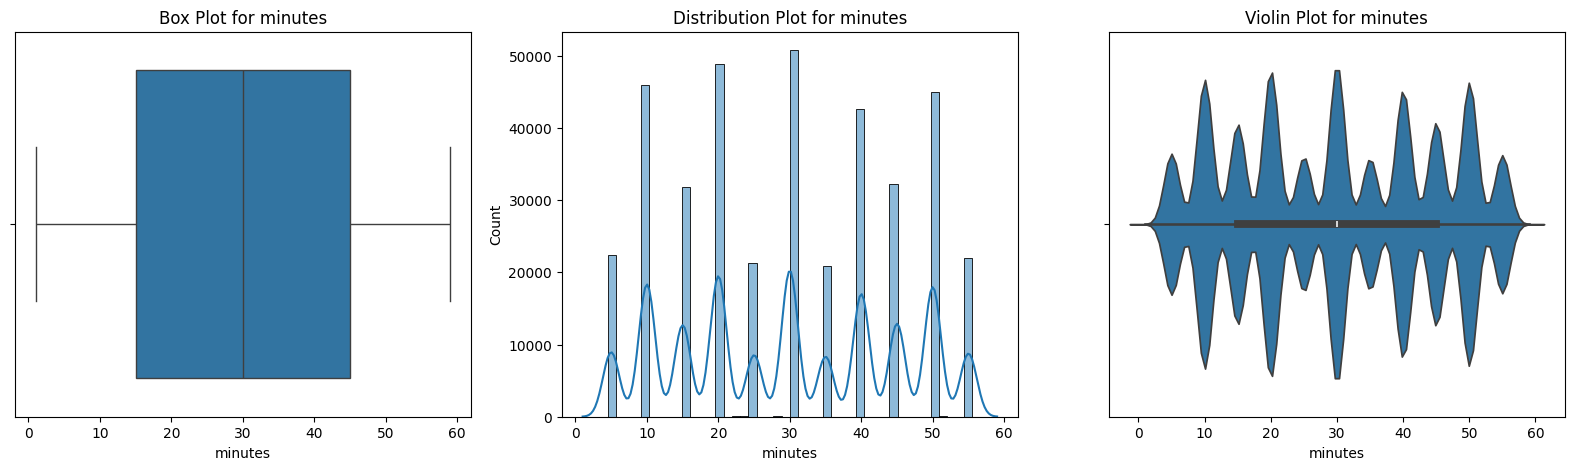

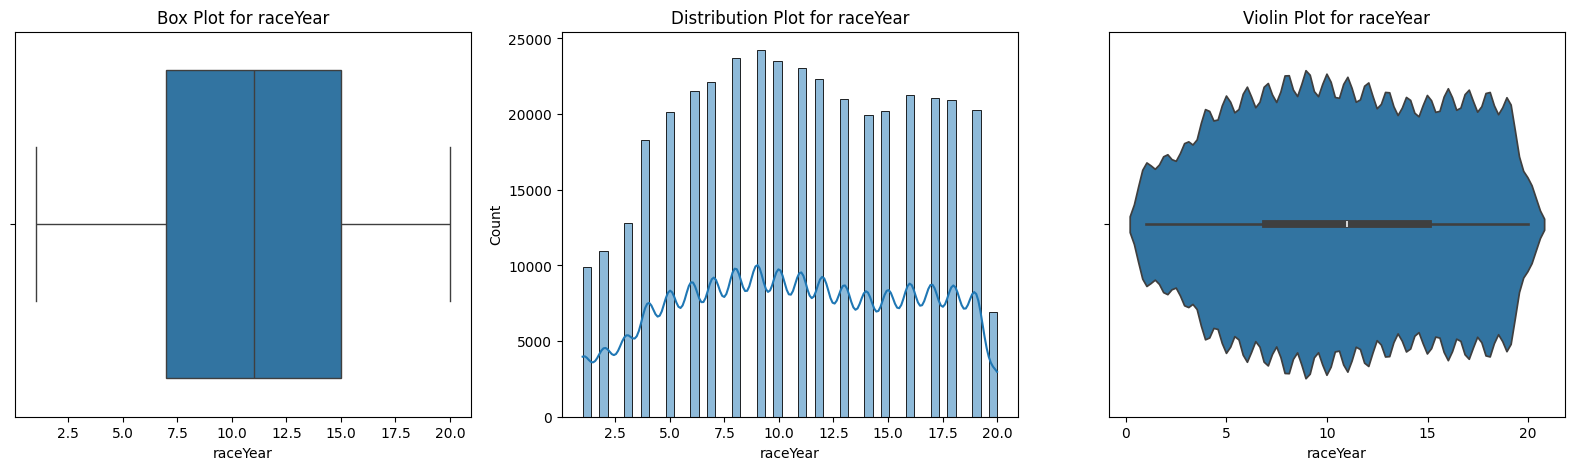

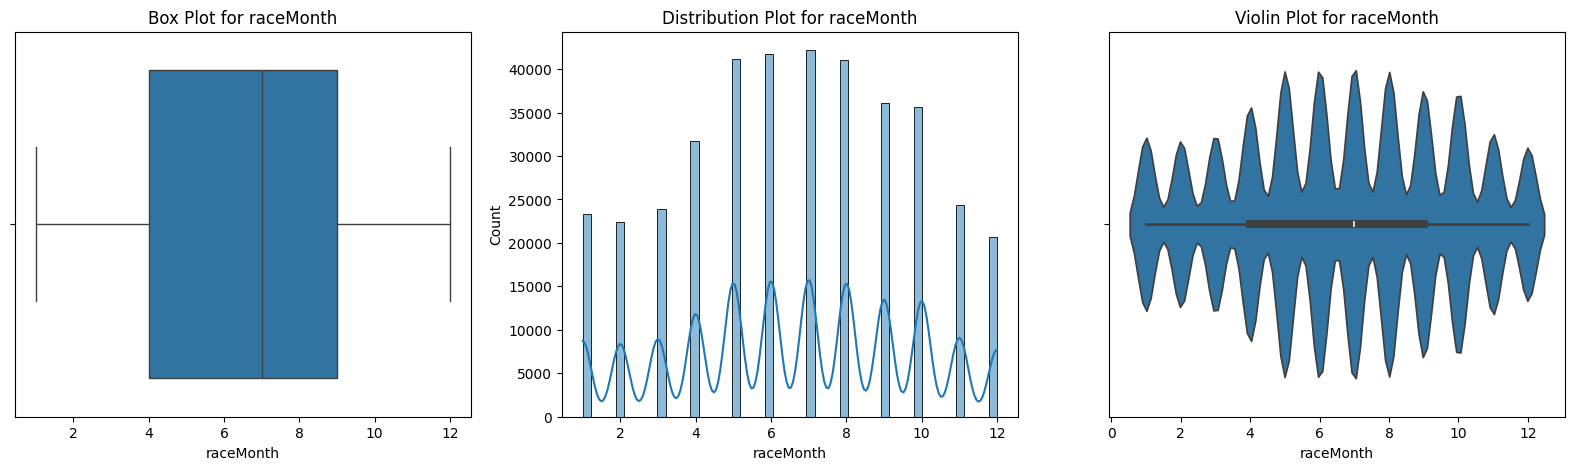

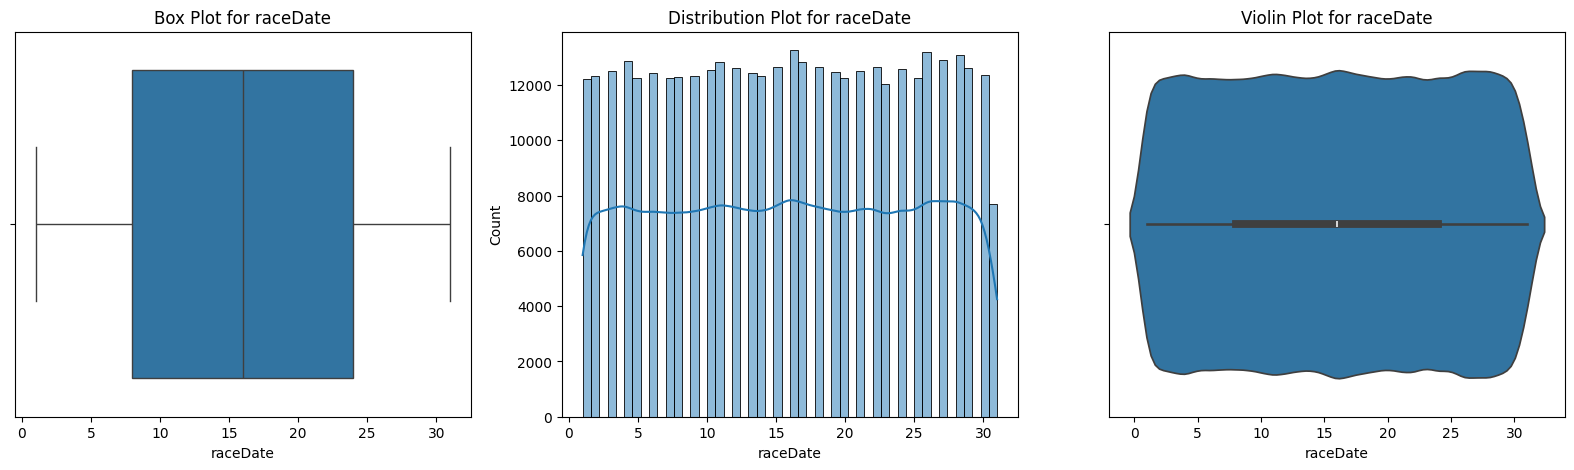

In [ ]:
for i in ['rid', 'age', 'saddle', 'decimalPrice','position','weightSt','weightLb','RPR','TR','OR','runners','margin','weight',
          'winningTime', 'prize', 'metric','class','distanceFeet','hours','minutes','raceYear','raceMonth','raceDate']:
    plot(merged_data, i)

In [76]:
merged_data.head()

rid  horseName   age  saddle  decimalPrice  trainerName  jockeyName  \
0  400501.0      27586   5.0    11.0      0.047619          990        2623   
1  400501.0      24955   5.0    10.0      0.090909          438        2125   
2  400501.0      18238   8.0     1.0      0.019608          990        2768   
3  400501.0      24679   6.0     9.0      0.125000          586        1932   
4  400501.0      12003  10.0     4.0      0.066667          264        1943   

   position positionL  dist  ...  metric  countryCode  ncond  class  \
0       4.0       .75   1.5  ...  1005.0            1      0    3.0   
1       7.0       .75  2.75  ...  1005.0            1      0    3.0   
2       8.0         1  3.75  ...  1005.0            1      0    3.0   
3       9.0      1.25   5.0  ...  1005.0            1      0    3.0   
4      11.0         1  6.25  ...  1005.0            1      0    3.0   

   distanceFeet  hours  minutes  raceYear  raceMonth  raceDate  
0           5.0    2.0     45.0       1.0        1.0       1.0  
1           5.0    2.0     45.0       1.0        1.0       1.0  
2           5.0    2.0     45.0       1.0        1.0       1.0  
3           5.0    2.0     45.0       1.0        1.0       1.0  
4           5.0    2.0     45.0       1.0        1.0       1.0  

[5 rows x 40 columns]

In [77]:
merged_data.describe().T

count           mean            std          min  \
rid           384238.0  197940.101546  115847.511012     8.000000   
horseName     384238.0   77989.771855   31110.124082     3.000000   
age           384238.0       5.217277       2.258224     2.000000   
saddle        384238.0       6.283436       3.758535     1.000000   
decimalPrice  384238.0       0.098056       0.061870     0.001996   
trainerName   384238.0    1337.449164    1019.372322     1.000000   
jockeyName    384238.0    3013.589075    1565.927124    12.000000   
position      384238.0       6.334657       2.693135     1.000000   
weightSt      384238.0       9.013583       1.025512     7.000000   
weightLb      384238.0       6.918941       3.696125     1.000000   
RPR           384238.0      62.936500      22.759985     1.000000   
TR            384238.0      42.678028      22.782992     1.000000   
OR            384238.0      74.427123      20.704005    10.000000   
father        384238.0    2845.405147    1015.449542     4.000000   
mother        384238.0   33667.204319   14294.555097    13.000000   
gfather       384238.0    2312.970568    1339.826699     2.000000   
runners       384238.0      10.876527       3.124528     3.000000   
margin        384238.0       1.184171       0.057724     1.007505   
weight        384238.0      59.855475       6.394343    45.000000   
res_win       384238.0       0.000003       0.001613     0.000000   
res_place     384238.0       0.120772       0.325862     0.000000   
course        384238.0      30.097609      20.135160     1.000000   
title         384238.0   93474.004380   31592.845599    72.000000   
rclass        384238.0       3.577673       1.339827     1.000000   
ages          384238.0       2.878151       2.141560     1.000000   
condition     384238.0       3.416713       2.424256     1.000000   
winningTime   384238.0     152.167384      91.367895    53.900000   
prize         384238.0    6769.599347    4016.370144  1106.000000   
metric        384238.0    2214.422466    1103.211822  1005.000000   
countryCode   384238.0       1.000000       0.000000     1.000000   
class         384238.0       4.627593       1.136259     1.000000   
distanceFeet  384238.0       6.237769       1.949227     2.500000   
hours         384238.0       4.176050       2.038618     1.000000   
minutes       384238.0      29.775048      15.203263     1.000000   
raceYear      384238.0      10.794245       5.181113     1.000000   
raceMonth     384238.0       6.619207       3.073961     1.000000   
raceDate      384238.0      15.869833       8.830649     1.000000   

                        25%            50%            75%            max  
rid           102829.000000  187925.000000  297697.000000  415018.000000  
horseName      51626.250000   76963.000000  103172.000000  143851.000000  
age                3.000000       5.000000       7.000000      13.000000  
saddle             3.000000       6.000000       9.000000      18.000000  
decimalPrice       0.047619       0.083333       0.133333       0.277778  
trainerName      450.000000    1153.000000    1976.000000    4235.000000  
jockeyName      1924.000000    2913.000000    4112.000000    6662.000000  
position           4.000000       6.000000       8.000000      14.000000  
weightSt           8.000000       9.000000       9.000000      12.000000  
weightLb           4.000000       7.000000      10.000000      13.000000  
RPR               47.000000      61.000000      77.000000     138.000000  
TR                26.000000      41.000000      57.000000     115.000000  
OR                59.000000      71.000000      86.000000     146.000000  
father          2240.000000    2940.000000    3654.000000    4855.000000  
mother         23014.000000   32378.500000   44480.000000   67060.000000  
gfather         1088.000000    2255.000000    3215.000000    5694.000000  
runners            9.000000      11.000000      13.000000      21.000000  
margin             1.142924       1.177871  

In [78]:
x = merged_data[['rid', 'age', 'saddle', 'decimalPrice','position','weightSt','weightLb','RPR','TR','OR','runners','margin','weight',
          'winningTime', 'prize', 'metric','class','distanceFeet','hours','minutes','raceYear','raceMonth','raceDate']].corr()

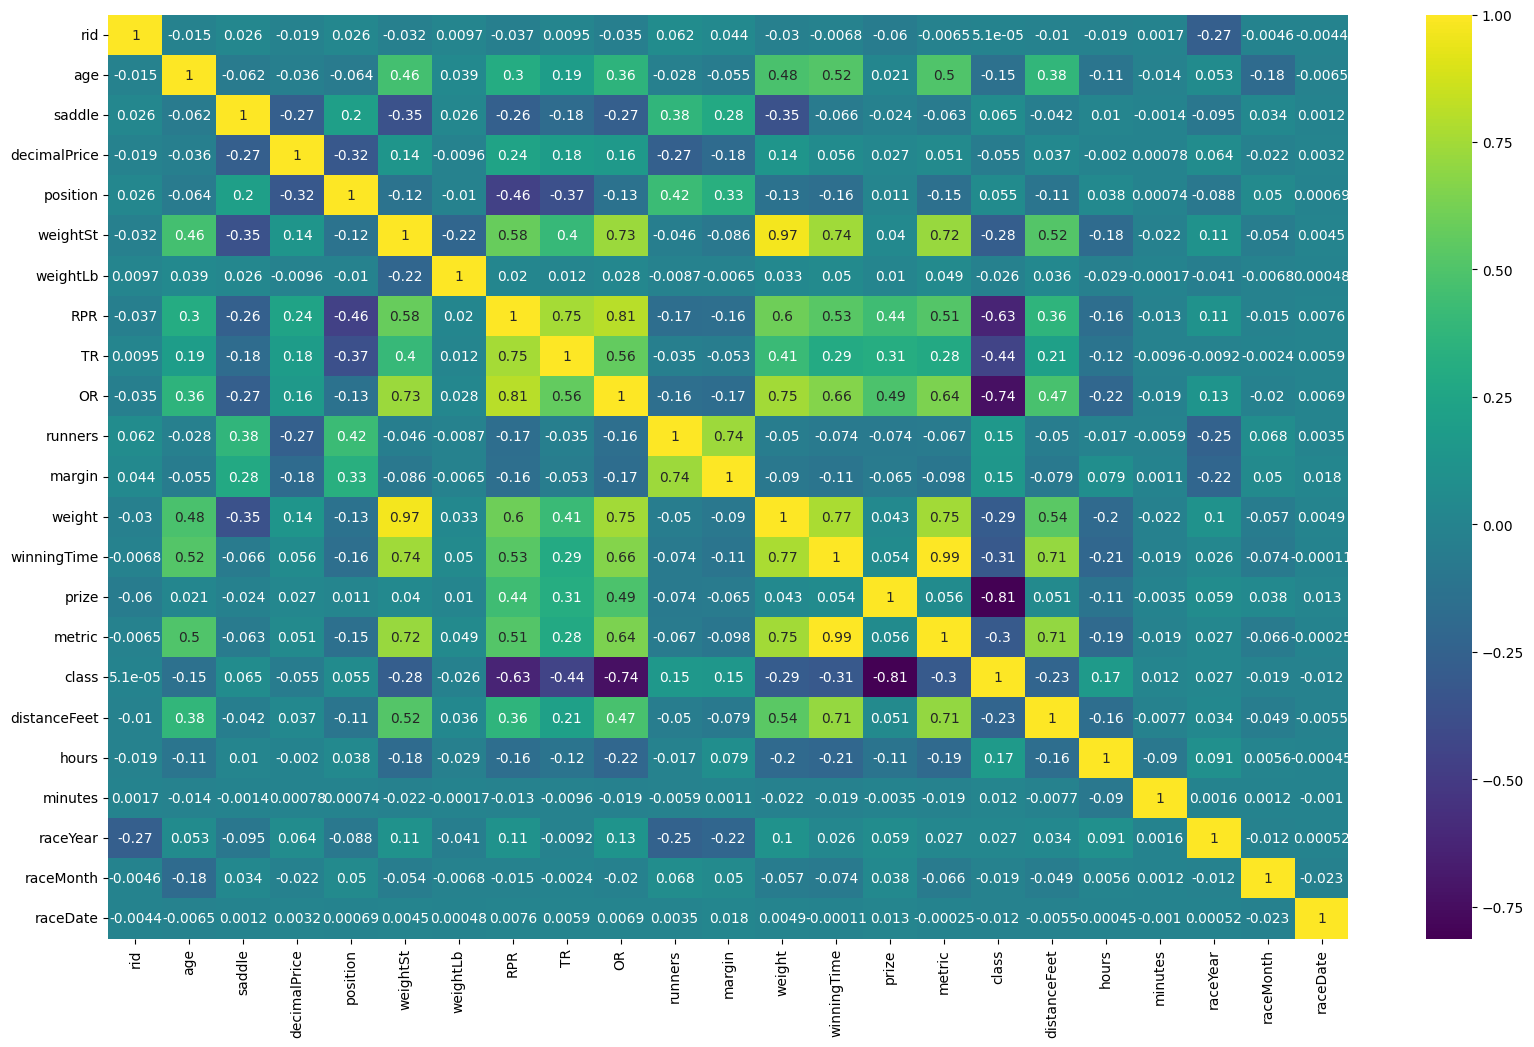

In [79]:
plt.figure(figsize=(20, 12))
sns.heatmap(x, annot=True, cmap="viridis")
plt.show()

In [80]:
merged_data.columns

Index(['rid', 'horseName', 'age', 'saddle', 'decimalPrice', 'trainerName',
       'jockeyName', 'position', 'positionL', 'dist', 'weightSt', 'weightLb',
       'RPR', 'TR', 'OR', 'father', 'mother', 'gfather', 'runners', 'margin',
       'weight', 'res_win', 'res_place', 'course', 'title', 'rclass', 'ages',
       'condition', 'winningTime', 'prize', 'metric', 'countryCode', 'ncond',
       'class', 'distanceFeet', 'hours', 'minutes', 'raceYear', 'raceMonth',
       'raceDate'],
      dtype='object')

In [81]:
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 72)

In [82]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(307390, 39) (76848, 39) (307390,) (76848,)


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
model = LogisticRegression()
model.fit(X,y)
merged_data['pred'] = model.predict(X)

print(f"Accuracy: {accuracy_score(y,merged_data['pred'])}")
print(f"Precision_score: {precision_score(y,merged_data['pred'])}")
print(f"Recall_score: {accuracy_score(y,merged_data['pred'])}")
print(f"F1_score: {f1_score(y,merged_data['pred'])}")
print('Classification_report:')
print(classification_report(y,merged_data['pred']))

Accuracy: 0.879228499003222
Precision_score: 0.0
Recall_score: 0.879228499003222
F1_score: 0.0
Classification_report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94    337833
         1.0       0.00      0.00      0.00     46405

    accuracy                           0.88    384238
   macro avg       0.44      0.50      0.47    384238
weighted avg       0.77      0.88      0.82    384238



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier()

# Fit the model
model.fit(X, y)

# Make predictions
merged_data['pred'] = model.predict(X)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y, merged_data['pred'])}")
print(f"Precision: {precision_score(y, merged_data['pred'])}")
print(f"Recall: {recall_score(y, merged_data['pred'])}")
print(f"F1 Score: {f1_score(y, merged_data['pred'])}")
print('Classification Report:')
print(classification_report(y, merged_data['pred']))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    337833
         1.0       1.00      1.00      1.00     46405

    accuracy                           1.00    384238
   macro avg       1.00      1.00      1.00    384238
weighted avg       1.00      1.00      1.00    384238



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Initialize the GradientBoostingClassifier
model = GradientBoostingClassifier()

# Fit the model
model.fit(X, y)

# Make predictions
merged_data['pred'] = model.predict(X)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y, merged_data['pred'])}")
print(f"Precision: {precision_score(y, merged_data['pred'])}")
print(f"Recall: {recall_score(y, merged_data['pred'])}")
print(f"F1 Score: {f1_score(y, merged_data['pred'])}")
print('Classification Report:')
print(classification_report(y, merged_data['pred']))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    337833
         1.0       1.00      1.00      1.00     46405

    accuracy                           1.00    384238
   macro avg       1.00      1.00      1.00    384238
weighted avg       1.00      1.00      1.00    384238



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Initialize the MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=1)

# Fit the model
model.fit(X, y)

# Make predictions
merged_data['pred'] = model.predict(X)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y, merged_data['pred'])}")
print(f"Precision: {precision_score(y, merged_data['pred'])}")
print(f"Recall: {recall_score(y, merged_data['pred'])}")
print(f"F1 Score: {f1_score(y, merged_data['pred'])}")
print('Classification Report:')
print(classification_report(y, merged_data['pred']))

Accuracy: 0.9639390169634445
Precision: 0.9010176674962422
Recall: 0.7879754336817153
F1 Score: 0.840713661654481
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    337833
         1.0       0.90      0.79      0.84     46405

    accuracy                           0.96    384238
   macro avg       0.94      0.89      0.91    384238
weighted avg       0.96      0.96      0.96    384238



In [98]:
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold

In [101]:
model = LogisticRegression()
model.fit(X,y)
merged_data['pred'] = model.predict(X)

model = LogisticRegression(max_iter=200)
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5)
# Perform cross-validation
y_pred = cross_val_predict(model, X, y, cv=cv)

print(f"Accuracy: {accuracy_score(y,merged_data['pred'])}")
print(f"Precision_score: {precision_score(y,merged_data['pred'])}")
print(f"Recall_score: {accuracy_score(y,merged_data['pred'])}")
print(f"F1_score: {f1_score(y,merged_data['pred'])}")
print('Classification_report:')
print(classification_report(y,merged_data['pred']))

# If you want to see the cross-validation scores for each fold
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores)}")

Accuracy: 0.879228499003222
Precision_score: 0.0
Recall_score: 0.879228499003222
F1_score: 0.0
Classification_report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94    337833
         1.0       0.00      0.00      0.00     46405

    accuracy                           0.88    384238
   macro avg       0.44      0.50      0.47    384238
weighted avg       0.77      0.88      0.82    384238

Cross-Validation Scores: [0.87256663 0.87916406 0.87921611 0.87840775 0.87922756]
Mean CV Score: 0.8777164210787565
Standard Deviation of CV Scores: 0.002593322558204962


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
model = RandomForestClassifier(n_estimators=100)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Perform cross-validation
y_pred = cross_val_predict(model, X, y, cv=cv)

# Calculate and print the metrics
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(f"Precision_score: {precision_score(y, y_pred, average='weighted')}")
print(f"Recall_score: {recall_score(y, y_pred, average='weighted')}")
print(f"F1_score: {f1_score(y, y_pred, average='weighted')}")
print('Classification_report:')
print(classification_report(y, y_pred))

# If you want to see the cross-validation scores for each fold
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores)}")

Accuracy: 0.9067765291303828
Precision_score: 0.9470180659210583
Recall_score: 0.9067765291303828
F1_score: 0.9170968642722055
Classification_report:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94    337833
         1.0       0.56      1.00      0.72     46405

    accuracy                           0.91    384238
   macro avg       0.78      0.95      0.83    384238
weighted avg       0.95      0.91      0.92    384238

Cross-Validation Scores: [0.49258276 0.99905007 0.99967468 0.99977878 0.99925827]
Mean CV Score: 0.8980689127551729
Standard Deviation of CV Scores: 0.20274325104827948


In [138]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
model = GradientBoostingClassifier()

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Perform cross-validation
y_pred = cross_val_predict(model, X, y, cv=cv)

# Calculate and print the metrics
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(f"Precision_score: {precision_score(y, y_pred, average='weighted')}")
print(f"Recall_score: {recall_score(y, y_pred, average='weighted')}")
print(f"F1_score: {f1_score(y, y_pred, average='weighted')}")
print('Classification_report:')
print(classification_report(y, y_pred))

# If you want to see the cross-validation scores for each fold
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores)}")

Accuracy: 0.9999089106231034
Precision_score: 0.9999089732497992
Recall_score: 0.9999089106231034
F1_score: 0.9999089245869075
Classification_report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    337833
         1.0       1.00      1.00      1.00     46405

    accuracy                           1.00    384238
   macro avg       1.00      1.00      1.00    384238
weighted avg       1.00      1.00      1.00    384238

Cross-Validation Scores: [1.         1.         0.99998699 1.         0.99955756]
Mean CV Score: 0.9999089099457695
Standard Deviation of CV Scores: 0.0001757460352273561


In [137]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [85]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42, early_stopping=True)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Perform cross-validation
y_pred = cross_val_predict(model, X, y, cv=cv)

# Calculate and print the metrics
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(f"Precision_score: {precision_score(y, y_pred, average='weighted')}")
print(f"Recall_score: {recall_score(y, y_pred, average='weighted')}")
print(f"F1_score: {f1_score(y, y_pred, average='weighted')}")
print('Classification_report:')
print(classification_report(y, y_pred))

# If you want to see the cross-validation scores for each fold
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores)}")

Accuracy: 0.9038252333189325
Precision_score: 0.8914116328314461
Recall_score: 0.9038252333189325
F1_score: 0.8925004440860927
Classification_report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    337833
         1.0       0.67      0.39      0.50     46405

    accuracy                           0.90    384238
   macro avg       0.80      0.68      0.72    384238
weighted avg       0.89      0.90      0.89    384238

Cross-Validation Scores: [0.92194982 0.91118832 0.90468197 0.90216925 0.87913647]
Mean CV Score: 0.903825164755651
Standard Deviation of CV Scores: 0.01411189088086552


# Smote

In [142]:
from imblearn.over_sampling import SMOTE

In [175]:
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 72)

In [131]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(307390, 40) (76848, 40) (307390,) (76848,)


In [143]:
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']
ros = SMOTE()
X,y = ros.fit_resample(X,y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [144]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(307390, 40) (76848, 40) (540532,) (135134,)


In [156]:
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']

# Resample the data using SMOTE
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model on the training set
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

Accuracy: 0.5757692364615863
Precision_score: 0.5721840659340659
Recall_score: 0.614036380789528
F1_score: 0.5923719051749883
Classification_report:
              precision    recall  f1-score   support

         0.0       0.58      0.54      0.56     67296
         1.0       0.57      0.61      0.59     67838

    accuracy                           0.58    135134
   macro avg       0.58      0.58      0.58    135134
weighted avg       0.58      0.58      0.58    135134



In [160]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 37162
Before OverSampling, counts of label '0': 270228 



In [161]:
# Import the SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE object
sm = SMOTE(random_state=2)

# Fit and resample the training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Print the shapes of the resampled data
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# Print the counts of each class
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


After OverSampling, the shape of train_X: (540456, 40)
After OverSampling, the shape of train_y: (540456,) 

After OverSampling, counts of label '1': 270228
After OverSampling, counts of label '0': 270228


In [152]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test) 

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
# print classification report 
print(classification_report(y_test, predictions)) 

Accuracy: 0.5239433687278784
Precision_score: 0.13571561808830976
Recall_score: 0.551011576328032
F1_score: 0.2177891810989951
Classification_report:
              precision    recall  f1-score   support

         0.0       0.89      0.52      0.66     67605
         1.0       0.14      0.55      0.22      9243

    accuracy                           0.52     76848
   macro avg       0.52      0.54      0.44     76848
weighted avg       0.80      0.52      0.60     76848



In [141]:
# Fit the model
rf1 = RandomForestClassifier()
rf1.fit(X_train_res, y_train_res.ravel())
# Make predictions
predictions = rf1.predict(X_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

Accuracy: 0.9996356443889236
Precision_score: 0.9993497344749106
Recall_score: 0.9976198204046305
F1_score: 0.9984840281537628
Classification_report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67605
         1.0       1.00      1.00      1.00      9243

    accuracy                           1.00     76848
   macro avg       1.00      1.00      1.00     76848
weighted avg       1.00      1.00      1.00     76848



In [162]:
# Fit the model
rf1 = GradientBoostingClassifier()
rf1.fit(X_train_res, y_train_res.ravel())
# Make predictions
predictions = rf1.predict(X_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

Accuracy: 0.9999609618988132
Precision_score: 0.999675535366645
Recall_score: 1.0
F1_score: 0.9998377413597274
Classification_report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67605
         1.0       1.00      1.00      1.00      9243

    accuracy                           1.00     76848
   macro avg       1.00      1.00      1.00     76848
weighted avg       1.00      1.00      1.00     76848



In [163]:
# Fit the model
MLP1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42, early_stopping=True)
MLP1.fit(X_train_res, y_train_res.ravel())
# Make predictions
predictions = MLP1.predict(X_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

Accuracy: 0.8374713720591297
Precision_score: 0.4176682387545007
Recall_score: 0.8910526885210429
F1_score: 0.5687452523996962
Classification_report:
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90     67605
         1.0       0.42      0.89      0.57      9243

    accuracy                           0.84     76848
   macro avg       0.70      0.86      0.73     76848
weighted avg       0.91      0.84      0.86     76848



In [166]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 37162
Before OverSampling, counts of label '0': 270228 



# UnderSampling

In [176]:
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 72)

In [177]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(307390, 40) (76848, 40) (307390,) (76848,)


In [184]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the SMOTE object
sm = RandomUnderSampler(random_state=1)

# Fit and resample the training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Print the shapes of the resampled data
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# Print the counts of each class
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


After OverSampling, the shape of train_X: (74324, 40)
After OverSampling, the shape of train_y: (74324,) 

After OverSampling, counts of label '1': 37162
After OverSampling, counts of label '0': 37162


In [185]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test) 

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
# print classification report 
print(classification_report(y_test, predictions)) 

Accuracy: 0.5069357693108474
Precision_score: 0.13749557118995798
Recall_score: 0.5877961700746511
F1_score: 0.22286030723793507
Classification_report:
              precision    recall  f1-score   support

         0.0       0.90      0.50      0.64     67605
         1.0       0.14      0.59      0.22      9243

    accuracy                           0.51     76848
   macro avg       0.52      0.54      0.43     76848
weighted avg       0.81      0.51      0.59     76848



In [182]:
# Fit the model
rf1 = RandomForestClassifier()
rf1.fit(X_train_res, y_train_res.ravel())
# Make predictions
predictions = rf1.predict(X_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

Accuracy: 0.9998308348948574
Precision_score: 0.999350789872322
Recall_score: 0.9992426701287461
F1_score: 0.9992967270760076
Classification_report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67605
         1.0       1.00      1.00      1.00      9243

    accuracy                           1.00     76848
   macro avg       1.00      1.00      1.00     76848
weighted avg       1.00      1.00      1.00     76848



In [183]:
# Fit the model
rf1 = GradientBoostingClassifier()
rf1.fit(X_train_res, y_train_res.ravel())
# Make predictions
predictions = rf1.predict(X_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

Accuracy: 1.0
Precision_score: 1.0
Recall_score: 1.0
F1_score: 1.0
Classification_report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67605
         1.0       1.00      1.00      1.00      9243

    accuracy                           1.00     76848
   macro avg       1.00      1.00      1.00     76848
weighted avg       1.00      1.00      1.00     76848



In [186]:
# Fit the model
MLP1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42, early_stopping=True)
MLP1.fit(X_train_res, y_train_res.ravel())
# Make predictions
predictions = MLP1.predict(X_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

Accuracy: 0.7328362481782219
Precision_score: 0.30197880850466635
Recall_score: 0.9311911716975008
F1_score: 0.4560604053517022
Classification_report:
              precision    recall  f1-score   support

         0.0       0.99      0.71      0.82     67605
         1.0       0.30      0.93      0.46      9243

    accuracy                           0.73     76848
   macro avg       0.64      0.82      0.64     76848
weighted avg       0.90      0.73      0.78     76848



# Underweight

### LogisticRegression

In [187]:
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']

# Resample the data using SMOTE
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model on the training set
LRUW = LogisticRegression(class_weight='balanced', random_state=1)
LRUW.fit(x_train, y_train)

# Make predictions on the test set
predictions = LRUW.predict(x_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

Accuracy: 0.5507126259860583
Precision_score: 0.5506397497867501
Recall_score: 0.5709484359798344
F1_score: 0.560610227387862
Classification_report:
              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54     67296
         1.0       0.55      0.57      0.56     67838

    accuracy                           0.55    135134
   macro avg       0.55      0.55      0.55    135134
weighted avg       0.55      0.55      0.55    135134



In [188]:
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']

# Resample the data using SMOTE
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model on the training set
RFCUW = RandomForestClassifier(class_weight='balanced', random_state=1)
RFCUW.fit(x_train, y_train)

# Make predictions on the test set
predictions = RFCUW.predict(x_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

Accuracy: 0.99985939881895
Precision_score: 0.9999262852172375
Recall_score: 0.9997936259913323
F1_score: 0.9998599512040511
Classification_report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67296
         1.0       1.00      1.00      1.00     67838

    accuracy                           1.00    135134
   macro avg       1.00      1.00      1.00    135134
weighted avg       1.00      1.00      1.00    135134



In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

In [190]:
# Define X and y
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']

# Resample the data using SMOTE
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Compute sample weights
sample_weights = compute_sample_weight('balanced', y_train)

# Train the model on the training set
RFCUW = GradientBoostingClassifier(random_state=1)
RFCUW.fit(x_train, y_train, sample_weight=sample_weights)

# Make predictions on the test set
predictions = RFCUW.predict(x_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

Accuracy: 0.9999629996891974
Precision_score: 0.9999410386049734
Recall_score: 0.9999852589993808
F1_score: 0.9999631483132982
Classification_report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67296
         1.0       1.00      1.00      1.00     67838

    accuracy                           1.00    135134
   macro avg       1.00      1.00      1.00    135134
weighted avg       1.00      1.00      1.00    135134



In [195]:
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define X and y
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']

# Resample the data using SMOTE
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight('balanced', y_train)

# Train the model on the training set
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42, early_stopping=True)
mlp.fit(x_train, y_train,sample_weight=sample_weights)

# Make predictions on the test set
predictions = mlp.predict(x_test)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision_score: {precision_score(y_test, predictions, average='binary')}")
print(f"Recall_score: {recall_score(y_test, predictions, average='binary')}")
print(f"F1_score: {f1_score(y_test, predictions, average='binary')}")
print('Classification_report:')
print(classification_report(y_test, predictions))

TypeError: BaseMultilayerPerceptron.fit() got an unexpected keyword argument 'sample_weight'

You're right; MLPClassifier does not directly accept the sample_weight parameter in the fit method. Instead, we need to handle class imbalance differently for MLPClassifier. One common approach is to manually balance the dataset during training. This can be done using the resample function from sklearn.utils.

### Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection technique used to identify the most important features for a machine learning model. The process involves recursively removing the least important features and building the model on the remaining features. The steps for RFE are as follows:

Train the Model: Train a model (e.g., linear regression, SVM) on the entire set of features.

Rank Features: Rank all the features based on their importance to the model (e.g., weights in a linear model).

Eliminate Features: Remove the least important feature(s).

Repeat: Repeat steps 1-3 with the reduced set of features until the desired number of features is reached.

In [197]:
# Splitting the data
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=72)
model_l1.fit(X_train, y_train)
merged_data['pred_l1'] = model_l1.predict(X)

print("L1 Regularization")
print(f"Accuracy: {accuracy_score(y, merged_data['pred_l1'])}")
print(f"Precision: {precision_score(y, merged_data['pred_l1'])}")
print(f"Recall: {recall_score(y, merged_data['pred_l1'])}")
print(f"F1 Score: {f1_score(y, merged_data['pred_l1'])}")
print('Classification Report:')
print(classification_report(y, merged_data['pred_l1']))

# L2 Regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=72)
model_l2.fit(X_train, y_train)
merged_data['pred_l2'] = model_l2.predict(X)

print("L2 Regularization")
print(f"Accuracy: {accuracy_score(y, merged_data['pred_l2'])}")
print(f"Precision: {precision_score(y, merged_data['pred_l2'])}")
print(f"Recall: {recall_score(y, merged_data['pred_l2'])}")
print(f"F1 Score: {f1_score(y, merged_data['pred_l2'])}")
print('Classification Report:')
print(classification_report(y, merged_data['pred_l2']))

L1 Regularization
Accuracy: 0.9997085139939308
Precision: 0.9979348176831236
Recall: 0.9996552095679345
F1 Score: 0.9987942727957799
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    337833
         1.0       1.00      1.00      1.00     46405

    accuracy                           1.00    384238
   macro avg       1.00      1.00      1.00    384238
weighted avg       1.00      1.00      1.00    384238

L2 Regularization
Accuracy: 0.9241693950103842
Precision: 0.8480890179003386
Recall: 0.4533132205581295
F1 Score: 0.5908241935710373
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    337833
         1.0       0.85      0.45      0.59     46405

    accuracy                           0.92    384238
   macro avg       0.89      0.72      0.77    384238
weighted avg       0.92      0.92      0.91    384238



Implementing Elastic Net with Hyperparameter Tuning


In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Splitting the data
X = merged_data.drop(columns=['res_place'])
y = merged_data['res_place']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up the parameter grid for Elastic Net regularization
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'random_state': [72]
}

# Setting up the Logistic Regression model
model = LogisticRegression()

# Performing grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by grid search
best_params = grid_search.best_params_
print("Best parameters for Elastic Net regularization:", best_params)

# Fitting the model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_scaled, y_train)
merged_data['pred_en'] = best_model.predict(scaler.transform(X))

# Evaluating the model
print("Elastic Net Regularization with Hyperparameter Tuning")
print(f"Accuracy: {accuracy_score(y, merged_data['pred_en'])}")
print(f"Precision: {precision_score(y, merged_data['pred_en'])}")
print(f"Recall: {recall_score(y, merged_data['pred_en'])}")
print(f"F1 Score: {f1_score(y, merged_data['pred_en'])}")
print('Classification Report:')
print(classification_report(y, merged_data['pred_en']))

KeyboardInterrupt: 